# HoRel_PMHOEXEATTLTEINTRAF Distribution Analysis

This notebook analyzes the distribution of `HoRel_PMHOEXEATTLTEINTRAF` values from the Neighbour Data.csv file, grouped by 1-hour time frames.

## Analysis Overview:
1. Import necessary libraries
2. Load and preview the data
3. Convert time column to proper datetime format
4. Resample/group data by hour
5. Plot distributions for each hour

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [7]:
# Load and preview the data
df = pd.read_csv('Neighbour Data.csv')

print("Dataset shape:", df.shape)
# print("\nFirst 5 rows:")
# print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nBasic statistics for HoRel_PMHOEXEATTLTEINTRAF:")
print(df['HoRel_PMHOEXEATTLTEINTRAF'].describe())

Dataset shape: (316580, 10)

Column names:
['PERIOD_START_TIME', 'REGION', 'MARKET', 'NEIGHBOR_FREQRELATION', 'SOURCE SITE', 'CELL', 'NEIGHBOR_CELL', 'TARGET SITE', 'CAT', 'HoRel_PMHOEXEATTLTEINTRAF']

Data types:
PERIOD_START_TIME            object
REGION                       object
MARKET                       object
NEIGHBOR_FREQRELATION         int64
SOURCE SITE                  object
CELL                         object
NEIGHBOR_CELL                object
TARGET SITE                  object
CAT                          object
HoRel_PMHOEXEATTLTEINTRAF     int64
dtype: object

Basic statistics for HoRel_PMHOEXEATTLTEINTRAF:
count    316580.000000
mean          1.460651
std          11.257698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         789.000000
Name: HoRel_PMHOEXEATTLTEINTRAF, dtype: float64


In [8]:
# Convert time column to proper datetime format
print("Original PERIOD_START_TIME format:")
print(df['PERIOD_START_TIME'].head())

# Convert to datetime
df['PERIOD_START_TIME'] = pd.to_datetime(df['PERIOD_START_TIME'], format='%m-%d-%Y %H:%M')

print("\nConverted PERIOD_START_TIME format:")
print(df['PERIOD_START_TIME'].head())

# Create hour column for grouping
df['Hour'] = df['PERIOD_START_TIME'].dt.hour

print("\nUnique hours in the dataset:")
print(sorted(df['Hour'].unique()))

print(f"\nDate range: {df['PERIOD_START_TIME'].min()} to {df['PERIOD_START_TIME'].max()}")

Original PERIOD_START_TIME format:
0    09-02-2025 15:45
1    09-02-2025 15:30
2    09-02-2025 15:15
3    09-03-2025 08:00
4    09-02-2025 14:15
Name: PERIOD_START_TIME, dtype: object

Converted PERIOD_START_TIME format:
0   2025-09-02 15:45:00
1   2025-09-02 15:30:00
2   2025-09-02 15:15:00
3   2025-09-03 08:00:00
4   2025-09-02 14:15:00
Name: PERIOD_START_TIME, dtype: datetime64[ns]

Unique hours in the dataset:
[np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23)]

Date range: 2025-09-02 14:00:00 to 2025-09-03 10:45:00


In [9]:
# Resample/group data by hour
# Set PERIOD_START_TIME as index for resampling
df_indexed = df.set_index('PERIOD_START_TIME')

# Resample by hour and get statistics
hourly_stats = df_indexed.groupby(df_indexed.index.hour)['HoRel_PMHOEXEATTLTEINTRAF'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print("Hourly statistics for HoRel_PMHOEXEATTLTEINTRAF:")
print(hourly_stats)

# Create a summary for each hour
hourly_data = {}
for hour in sorted(df['Hour'].unique()):
    hour_data = df[df['Hour'] == hour]['HoRel_PMHOEXEATTLTEINTRAF']
    hourly_data[hour] = hour_data

print(f"\nTotal records per hour:")
for hour in sorted(hourly_data.keys()):
    print(f"Hour {hour:02d}: {len(hourly_data[hour])} records")

Hourly statistics for HoRel_PMHOEXEATTLTEINTRAF:
                   count  mean  median    std  min  max
PERIOD_START_TIME                                      
0                  15357  0.21     0.0   1.69    0   64
1                  15359  0.13     0.0   1.11    0   40
2                  15257  0.10     0.0   1.29    0   68
3                  15169  0.08     0.0   0.77    0   37
4                  15162  0.10     0.0   0.88    0   47
5                  15160  0.26     0.0   2.13    0  106
6                  15162  0.71     0.0   4.54    0  173
7                  15184  1.93     0.0  12.21    0  652
8                  15202  2.86     0.0  16.62    0  670
9                  15215  2.26     0.0  13.01    0  546
10                 11974  2.32     0.0  14.45    0  579
14                 15050  2.90     0.0  16.99    0  665
15                 15123  3.46     0.0  19.92    0  789
16                 15161  2.87     0.0  17.84    0  662
17                 15205  2.86     0.0  18.18    0  560

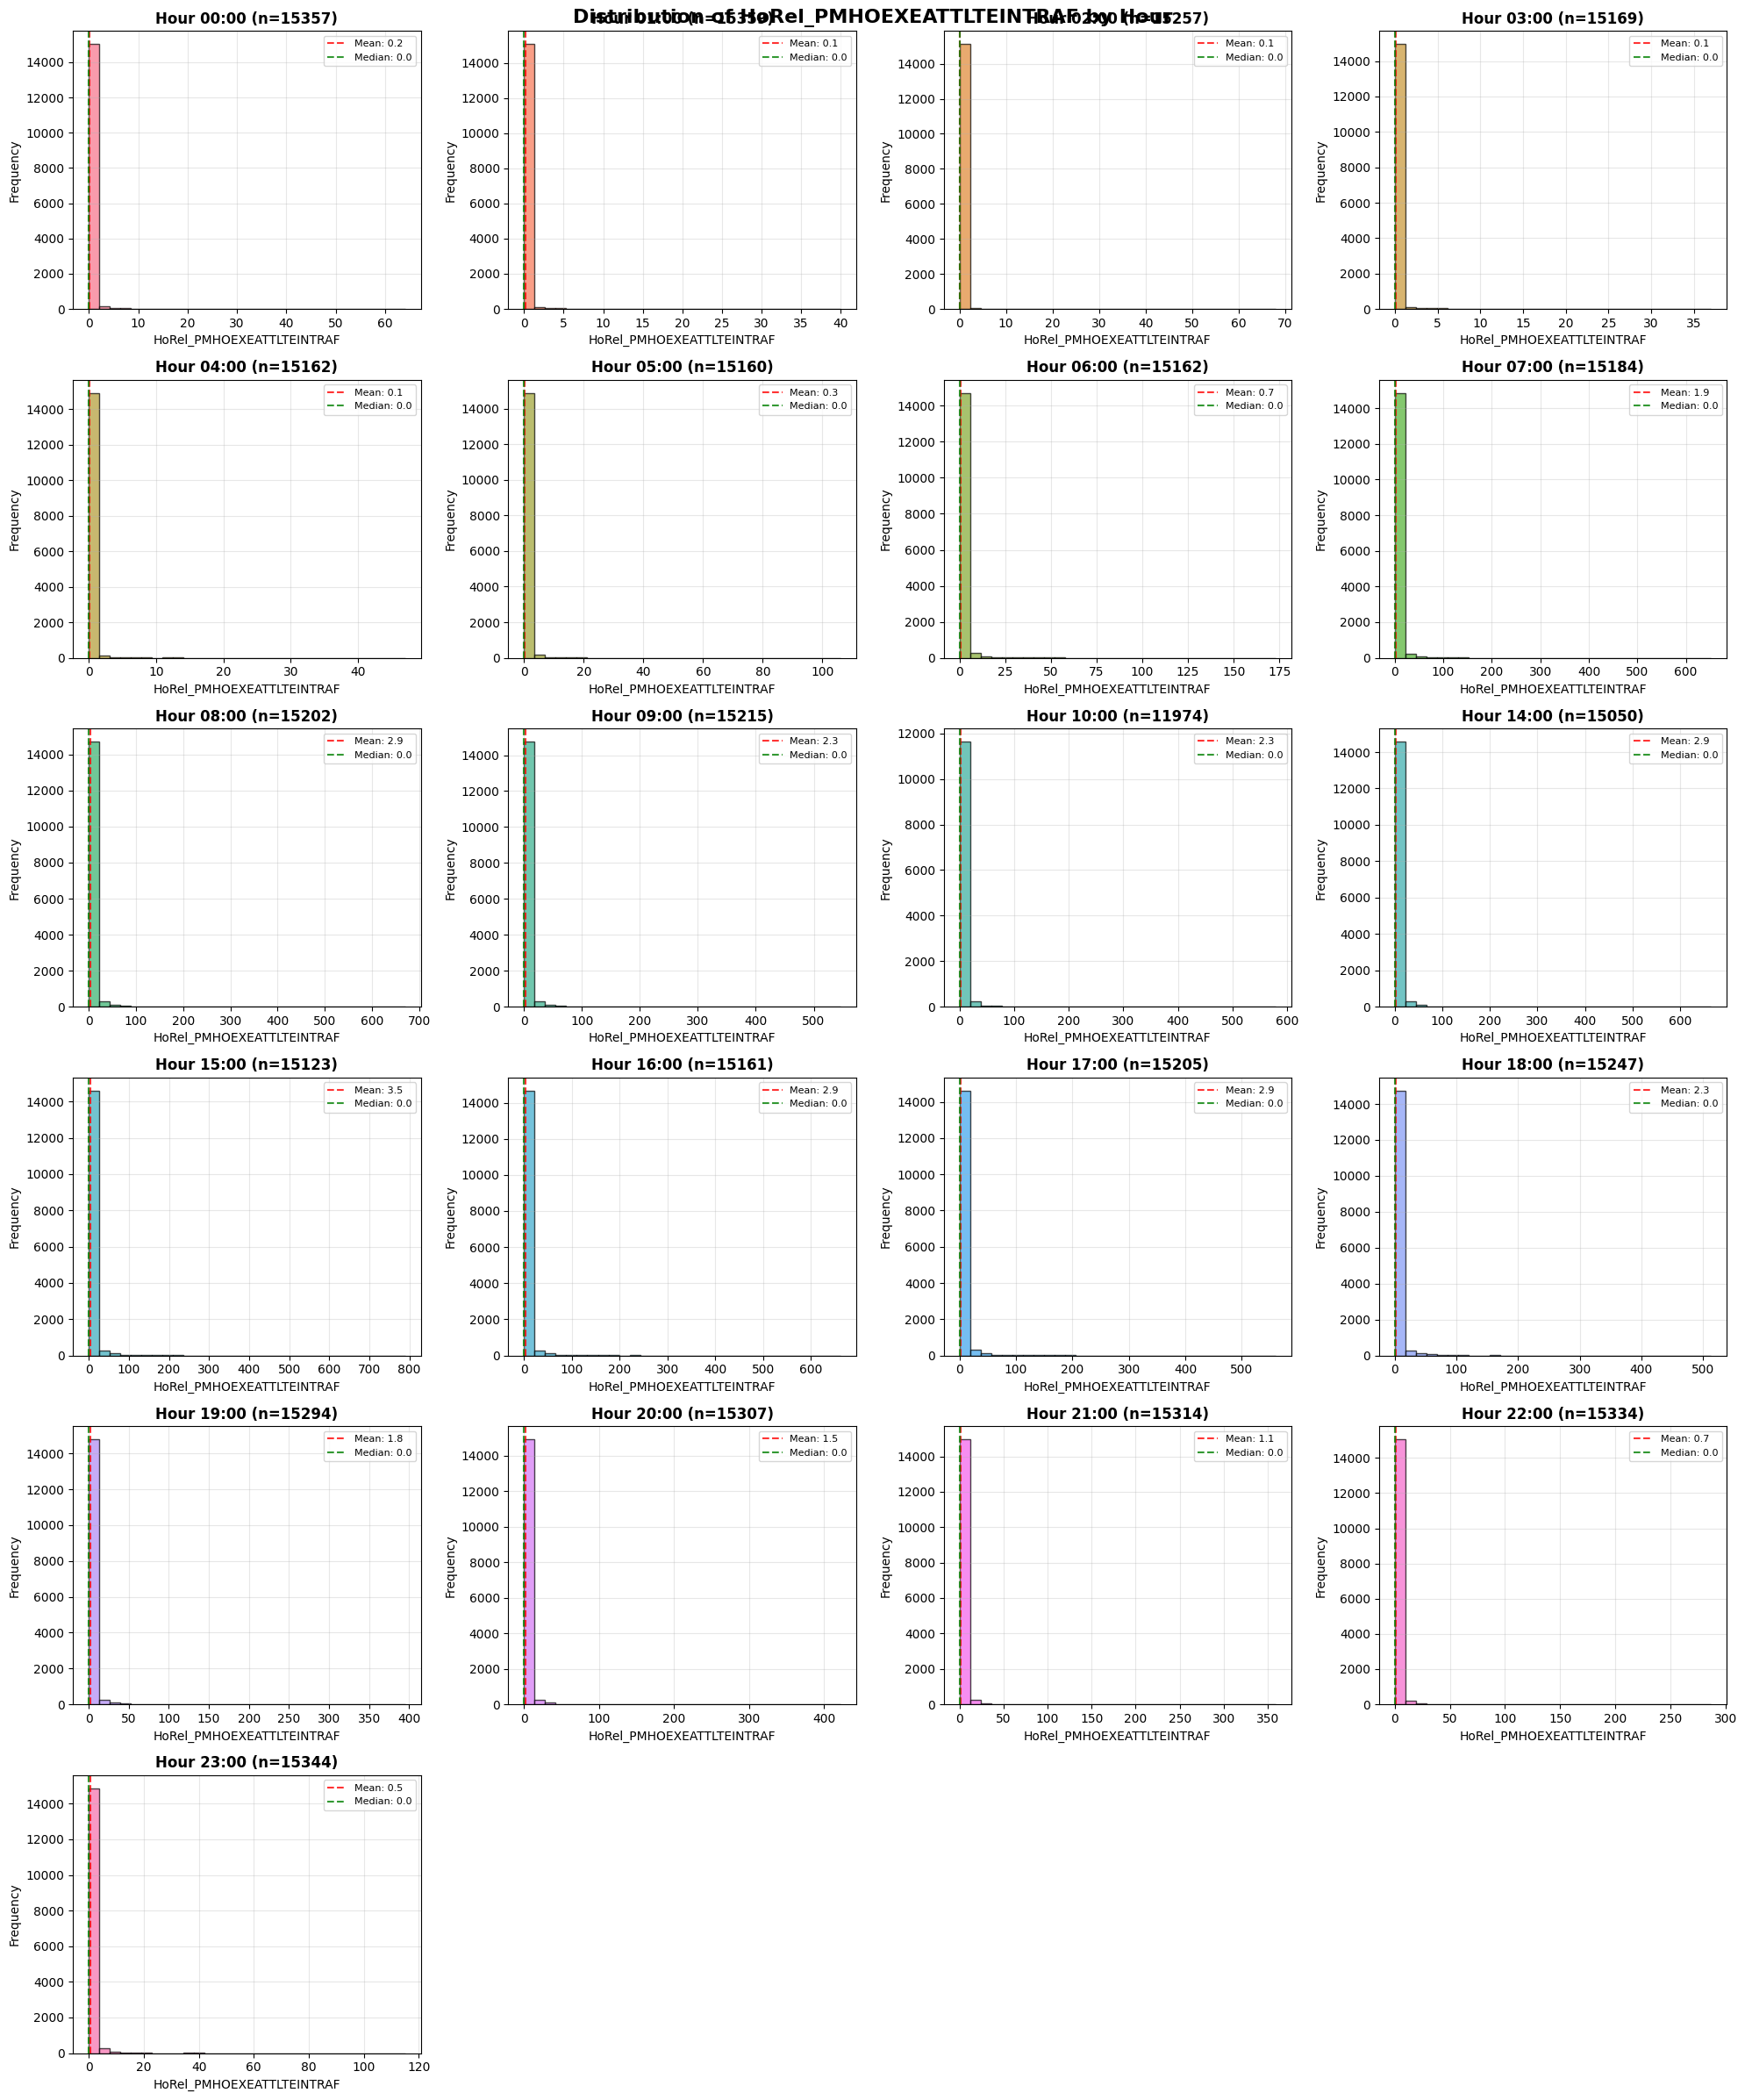

In [10]:
# Plot distributions for each hour
hours_available = sorted(df['Hour'].unique())
n_hours = len(hours_available)

# Create subplots for all hours
fig, axes = plt.subplots(6, 4, figsize=(20, 24))
axes = axes.flatten()

for i, hour in enumerate(hours_available):
    if i < len(axes):
        ax = axes[i]
        hour_data = df[df['Hour'] == hour]['HoRel_PMHOEXEATTLTEINTRAF']
        
        # Plot histogram
        ax.hist(hour_data, bins=30, alpha=0.7, color=sns.color_palette("husl", n_hours)[i], edgecolor='black')
        ax.set_title(f'Hour {hour:02d}:00 (n={len(hour_data)})', fontsize=12, fontweight='bold')
        ax.set_xlabel('HoRel_PMHOEXEATTLTEINTRAF')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)
        
        # Add statistics text
        mean_val = hour_data.mean()
        median_val = hour_data.median()
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.1f}')
        ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.1f}')
        ax.legend(fontsize=8)

# Hide unused subplots
for i in range(len(hours_available), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribution of HoRel_PMHOEXEATTLTEINTRAF by Hour', fontsize=16, fontweight='bold', y=0.995)
plt.show()

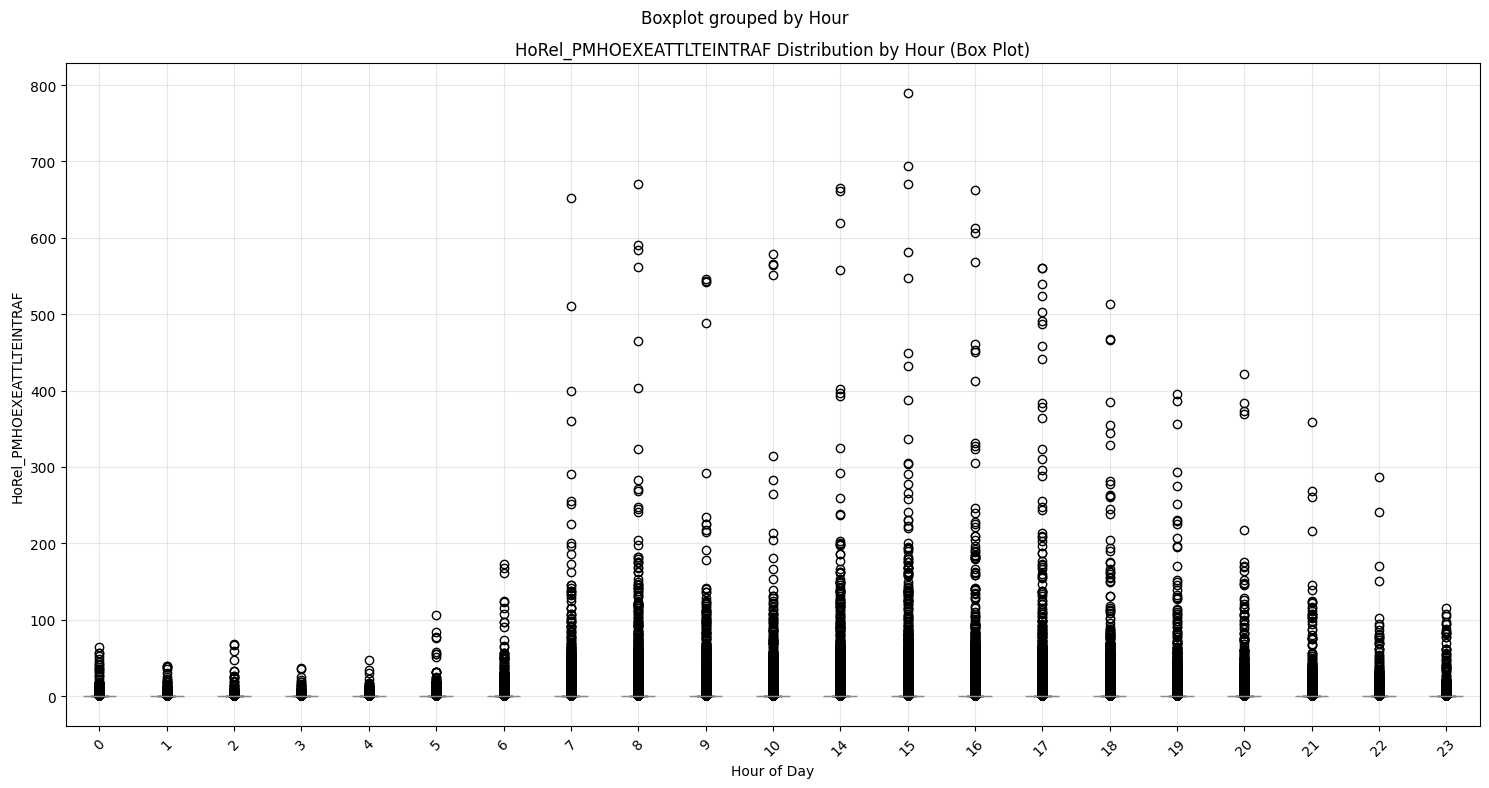

In [11]:
# Box plot comparison across hours
plt.figure(figsize=(15, 8))
df.boxplot(column='HoRel_PMHOEXEATTLTEINTRAF', by='Hour', ax=plt.gca())
plt.title('HoRel_PMHOEXEATTLTEINTRAF Distribution by Hour (Box Plot)')
plt.xlabel('Hour of Day')
plt.ylabel('HoRel_PMHOEXEATTLTEINTRAF')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Alternative violin plot for better distribution visualization
# plt.figure(figsize=(15, 8))
# sns.violinplot(data=df, x='Hour', y='HoRel_PMHOEXEATTLTEINTRAF')
# plt.title('HoRel_PMHOEXEATTLTEINTRAF Distribution by Hour (Violin Plot)')
# plt.xlabel('Hour of Day')
# plt.ylabel('HoRel_PMHOEXEATTLTEINTRAF')
# plt.xticks(rotation=45)
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

SUMMARY ANALYSIS OF HoRel_PMHOEXEATTLTEINTRAF BY HOUR

Overall Dataset Statistics:
Total records: 316,580
Date range: 2025-09-02 14:00 to 2025-09-03 10:45
Overall mean: 1.46
Overall median: 0.00
Overall std dev: 11.26

Peak Hours:
Highest mean HoRel_PMHOEXEATTLTEINTRAF: Hour 15 (3.46)
Highest median HoRel_PMHOEXEATTLTEINTRAF: Hour 00 (0.00)
Most records: Hour 01 (15,359 records)

Low Hours:
Lowest mean HoRel_PMHOEXEATTLTEINTRAF: Hour 03 (0.08)
Lowest median HoRel_PMHOEXEATTLTEINTRAF: Hour 00 (0.00)
Fewest records: Hour 10 (11,974 records)

Hourly Trend Analysis:


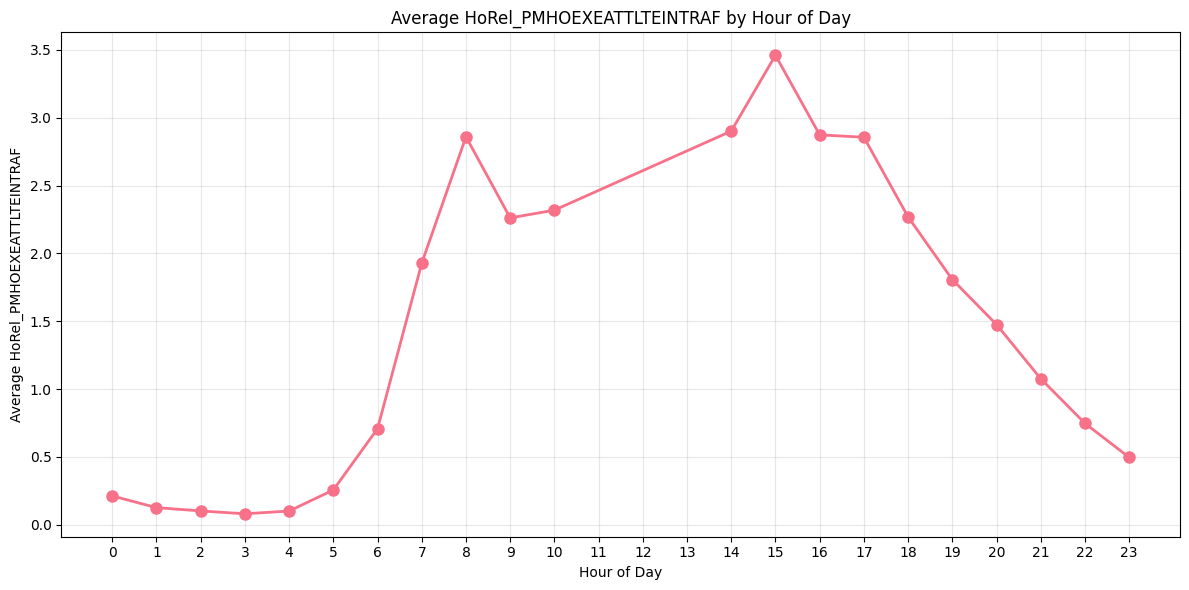

Analysis complete!


In [12]:
# Summary statistics and insights
print("="*60)
print("SUMMARY ANALYSIS OF HoRel_PMHOEXEATTLTEINTRAF BY HOUR")
print("="*60)

# Overall statistics
print(f"\nOverall Dataset Statistics:")
print(f"Total records: {len(df):,}")
print(f"Date range: {df['PERIOD_START_TIME'].min().strftime('%Y-%m-%d %H:%M')} to {df['PERIOD_START_TIME'].max().strftime('%Y-%m-%d %H:%M')}")
print(f"Overall mean: {df['HoRel_PMHOEXEATTLTEINTRAF'].mean():.2f}")
print(f"Overall median: {df['HoRel_PMHOEXEATTLTEINTRAF'].median():.2f}")
print(f"Overall std dev: {df['HoRel_PMHOEXEATTLTEINTRAF'].std():.2f}")

# Find peak hours
peak_mean_hour = hourly_stats['mean'].idxmax()
peak_median_hour = hourly_stats['median'].idxmax()
peak_count_hour = hourly_stats['count'].idxmax()

print(f"\nPeak Hours:")
print(f"Highest mean HoRel_PMHOEXEATTLTEINTRAF: Hour {peak_mean_hour:02d} ({hourly_stats.loc[peak_mean_hour, 'mean']:.2f})")
print(f"Highest median HoRel_PMHOEXEATTLTEINTRAF: Hour {peak_median_hour:02d} ({hourly_stats.loc[peak_median_hour, 'median']:.2f})")
print(f"Most records: Hour {peak_count_hour:02d} ({hourly_stats.loc[peak_count_hour, 'count']:,} records)")

# Find low hours
low_mean_hour = hourly_stats['mean'].idxmin()
low_median_hour = hourly_stats['median'].idxmin()
low_count_hour = hourly_stats['count'].idxmin()

print(f"\nLow Hours:")
print(f"Lowest mean HoRel_PMHOEXEATTLTEINTRAF: Hour {low_mean_hour:02d} ({hourly_stats.loc[low_mean_hour, 'mean']:.2f})")
print(f"Lowest median HoRel_PMHOEXEATTLTEINTRAF: Hour {low_median_hour:02d} ({hourly_stats.loc[low_median_hour, 'median']:.2f})")
print(f"Fewest records: Hour {low_count_hour:02d} ({hourly_stats.loc[low_count_hour, 'count']:,} records)")

# Hourly trend analysis
print(f"\nHourly Trend Analysis:")
mean_by_hour = df.groupby('Hour')['HoRel_PMHOEXEATTLTEINTRAF'].mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_by_hour.index, mean_by_hour.values, marker='o', linewidth=2, markersize=8)
plt.title('Average HoRel_PMHOEXEATTLTEINTRAF by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average HoRel_PMHOEXEATTLTEINTRAF')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print("Analysis complete!")

In [13]:
df=pd.read_csv('docs\KPI.csv')
df1=pd.read_csv('Neighbour Data.csv')

In [14]:
print(df.columns)

Index(['PERIOD_START_TIME', 'SPECTRUM', 'REGION', 'MARKET', 'TAC', 'SITE',
       'ENODEB', 'SECTOR', 'CELL', 'Avg Nr RRC Connected Users',
       'Downlink PRB Utilization', 'VoLTE Drop Rate (%)',
       'ERAB Drop Rate eNodeB (%)', 'ERAB Drops eNodeB',
       'ERAB Initial Access Failure Rate (%)',
       'ERAB Initial Access Failures (c)', 'RRC Failures',
       'RRC Failure Rate (%)'],
      dtype='object')


In [15]:
#unique values in a column
print(df['PERIOD_START_TIME'].unique())

['08/24/2025 11:00' '08/24/2025 11:15' '08/24/2025 11:30'
 '08/24/2025 11:45' '08/24/2025 12:00' '08/24/2025 12:15'
 '08/24/2025 12:30' '08/24/2025 12:45' '08/24/2025 13:00'
 '08/24/2025 13:15' '08/24/2025 13:30' '08/24/2025 13:45'
 '08/24/2025 14:00' '08/24/2025 14:15' '08/24/2025 14:30'
 '08/24/2025 14:45' '08/24/2025 15:00' '08/24/2025 15:15'
 '08/24/2025 15:30' '08/24/2025 15:45' '08/24/2025 16:00'
 '08/24/2025 16:15' '08/24/2025 16:30' '08/24/2025 16:45'
 '08/24/2025 17:00' '08/24/2025 17:15' '08/24/2025 17:30'
 '08/24/2025 17:45' '08/24/2025 18:00' '08/24/2025 18:15'
 '08/24/2025 18:30' '08/24/2025 18:45' '08/24/2025 19:00'
 '08/24/2025 19:15' '08/24/2025 19:30' '08/24/2025 19:45'
 '08/24/2025 20:00' '08/24/2025 20:15' '08/24/2025 20:30'
 '08/24/2025 20:45' '08/24/2025 21:00' '08/24/2025 21:15'
 '08/24/2025 21:30' '08/24/2025 21:45' '08/24/2025 22:00'
 '08/24/2025 22:15' '08/24/2025 22:30' '08/24/2025 22:45'
 '08/24/2025 23:00' '08/24/2025 23:15' '08/24/2025 23:30'
 '08/24/2025 2

In [16]:
print(df1['PERIOD_START_TIME'].unique())

['09-02-2025 15:45' '09-02-2025 15:30' '09-02-2025 15:15'
 '09-03-2025 08:00' '09-02-2025 14:15' '09-02-2025 16:00'
 '09-02-2025 14:00' '09-03-2025 07:45' '09-02-2025 14:30'
 '09-02-2025 16:30' '09-02-2025 16:15' '09-03-2025 08:15'
 '09-03-2025 08:45' '09-02-2025 15:00' '09-03-2025 10:30'
 '09-02-2025 16:45' '09-03-2025 10:45' '09-03-2025 10:15'
 '09-03-2025 08:30' '09-02-2025 17:00' '09-02-2025 17:15'
 '09-02-2025 14:45' '09-03-2025 10:00' '09-03-2025 09:45'
 '09-03-2025 09:15' '09-03-2025 09:00' '09-02-2025 17:30'
 '09-02-2025 18:15' '09-03-2025 07:30' '09-02-2025 17:45'
 '09-03-2025 09:30' '09-02-2025 18:00' '09-02-2025 18:30'
 '09-02-2025 20:45' '09-03-2025 07:15' '09-02-2025 19:30'
 '09-02-2025 19:45' '09-02-2025 20:15' '09-02-2025 20:00'
 '09-02-2025 20:30' '09-02-2025 21:00' '09-02-2025 19:15'
 '09-02-2025 18:45' '09-02-2025 19:00' '09-03-2025 07:00'
 '09-02-2025 22:00' '09-02-2025 21:30' '09-02-2025 21:15'
 '09-02-2025 22:15' '09-02-2025 21:45' '09-03-2025 06:30'
 '09-02-2025 2

In [17]:
#new df with common time intervals
common_times = set(df['PERIOD_START_TIME']).intersection(set(df1['PERIOD_START_TIME']))
print(common_times)



{'09-03-2025 03:45', '09-03-2025 05:00', '09-03-2025 06:30', '09-03-2025 07:30', '09-02-2025 21:15', '09-03-2025 02:15', '09-02-2025 14:45', '09-03-2025 06:15', '09-03-2025 00:45', '09-02-2025 20:45', '09-03-2025 04:45', '09-03-2025 01:15', '09-02-2025 19:30', '09-02-2025 18:00', '09-02-2025 21:45', '09-02-2025 22:30', '09-02-2025 15:00', '09-03-2025 01:30', '09-03-2025 00:30', '09-03-2025 07:00', '09-02-2025 19:45', '09-03-2025 01:45', '09-02-2025 14:00', '09-02-2025 17:00', '09-03-2025 07:15', '09-02-2025 22:00', '09-03-2025 04:00', '09-02-2025 21:00', '09-02-2025 22:15', '09-02-2025 20:30', '09-02-2025 14:30', '09-02-2025 19:15', '09-02-2025 17:15', '09-03-2025 02:45', '09-02-2025 18:30', '09-03-2025 02:00', '09-03-2025 00:15', '09-02-2025 15:45', '09-03-2025 06:00', '09-02-2025 16:30', '09-02-2025 19:00', '09-03-2025 02:30', '09-02-2025 21:30', '09-02-2025 15:15', '09-03-2025 08:15', '09-03-2025 08:00', '09-03-2025 05:45', '09-03-2025 01:00', '09-03-2025 03:15', '09-02-2025 17:45',

In [18]:
#new df with common time intervals
df_common = df[df['PERIOD_START_TIME'].isin(common_times)]


In [19]:
csv_path="new_kpi.csv"
df_common.to_csv(csv_path, index=False)

In [20]:
common_cells=set(df_common['CELL']).intersection(set(df1['CELL']))
df_common=df_common[df_common['CELL'].isin(common_cells)]
print(df_common)

       PERIOD_START_TIME SPECTRUM REGION MARKET      TAC         SITE  \
102924  09-02-2025 14:00      600  South    TRV  7715360  TRVIE05339B   
102925  09-02-2025 14:00      PCS  South    TRV  7715360  TRVIE04999C   
102926  09-02-2025 14:00      600  South    TRV  7715360  TRVLA94091A   
102927  09-02-2025 14:00      700  South    TRV  7715360  TRVLA84947A   
102929  09-02-2025 14:00      AWS  South    TRV  7715360  TRVIE04624A   
...                  ...      ...    ...    ...      ...          ...   
110898  09-03-2025 08:15      700  South    TRV  7715360  TRVIE04310A   
110899  09-03-2025 08:15      600  South    TRV  7715360  TRVIE05356C   
110900  09-03-2025 08:15      700  South    TRV  7715360  TRVIE04624A   
110901  09-03-2025 08:15      700  South    TRV  7715360  TRVIE04310A   
110903  09-03-2025 08:15      700  South    TRV  7715360  TRVIE04376A   

               ENODEB        SECTOR            CELL  \
102924   TRVMIE05339B  TRVIE05339B3  TRVEIE05339B31   
102925  TRVMI

In [21]:
df_common.to_csv(csv_path, index=False)

In [22]:
# print(df_common['CELL'].unique())
# print(df_common['CELL'].nunique())

In [23]:
# print(df1['CELL'].unique())
# print(df1['CELL'].nunique())

In [37]:
#join 2 dfs based on a common column
df_merged = pd.merge(df_common, df1, on=['PERIOD_START_TIME', 'CELL'], suffixes=('_kpi', '_neigh'))
# df_merged.head()
print(df_merged)

       PERIOD_START_TIME SPECTRUM REGION_kpi MARKET_kpi      TAC         SITE  \
0       09-02-2025 14:00      600      South        TRV  7715360  TRVIE05339B   
1       09-02-2025 14:00      600      South        TRV  7715360  TRVIE05339B   
2       09-02-2025 14:00      600      South        TRV  7715360  TRVIE05339B   
3       09-02-2025 14:00      600      South        TRV  7715360  TRVIE05339B   
4       09-02-2025 14:00      600      South        TRV  7715360  TRVIE05339B   
...                  ...      ...        ...        ...      ...          ...   
281628  09-03-2025 08:15      700      South        TRV  7715360  TRVIE04376A   
281629  09-03-2025 08:15      700      South        TRV  7715360  TRVIE04376A   
281630  09-03-2025 08:15      700      South        TRV  7715360  TRVIE04376A   
281631  09-03-2025 08:15      700      South        TRV  7715360  TRVIE04376A   
281632  09-03-2025 08:15      700      South        TRV  7715360  TRVIE04376A   

              ENODEB       

In [25]:
import pandas as pd
pd.read_csv('Neighbour Data.csv',parse_dates=['PERIOD_START_TIME'])

,PERIOD_START_TIME,REGION,MARKET,NEIGHBOR_FREQRELATION,SOURCE SITE,CELL,NEIGHBOR_CELL,TARGET SITE,CAT,HoRel_PMHOEXEATTLTEINTRAF
0,2025-09-02 15:45:00,South,TRV,675,TRVLA84947A,TRVBLA84947A21,TRVBIE04947A21,TRVIE04947A,Different,789
1,2025-09-02 15:30:00,South,TRV,675,TRVLA84947A,TRVBLA84947A21,TRVBIE04947A21,TRVIE04947A,Different,694
2,2025-09-02 15:15:00,South,TRV,675,TRVLA84947A,TRVBLA84947A21,TRVBIE04947A21,TRVIE04947A,Different,671
3,2025-09-03 08:00:00,South,TRV,675,TRVLA84947A,TRVBLA84947A21,TRVBIE04947A21,TRVIE04947A,Different,670
4,2025-09-02 14:15:00,South,TRV,675,TRVLA84947A,TRVBLA84947A21,TRVBIE04947A21,TRVIE04947A,Different,665
...,...,...,...,...,...,...,...,...,...,...
316575,2025-09-03 10:45:00,South,TRV,675,TRVLA84947A,TRVBLA84947A21,TRVBLA92427A21,TRVLA92427A,Different,0
316576,2025-09-03 10:45:00,South,TRV,5035,TRVLA84947A,TRVLLA84947A31,TRVDIE04768A31,TRVIE04768A,Different,0
316577,2025-09-03 10:45:00,South,TRV,675,TRVLA84947A,TRVBLA84947A21,TRVBIE05363E21,TRVIE05363E,Different,0
316578,2025-09-03 10:45:00,South,TRV,675,TRVLA84947A,TRVBLA84947A21,TRVBIE04005A31,TRVIE04005A,Different,0


In [38]:
df_merged.to_csv("merged_data.csv", index=False)

In [39]:


# Group by CELL and get unique NEIGHBOR_CELL for each
cell_neighbor_mapping = df_merged.groupby('CELL')['NEIGHBOR_CELL'].unique()

print(f"\nNumber of unique cells: {len(cell_neighbor_mapping)}")
print("\nUnique neighbor cells for each cell:")
print("-" * 80)

for cell, neighbors in cell_neighbor_mapping.items():
    neighbors_list = sorted(neighbors.tolist())
    print(f"\nCell: {cell}")
    print(f"Number of unique neighbors: {len(neighbors_list)}")
    print(f"Neighbor cells: {neighbors_list}")
    
# Summary statistics
neighbor_counts = cell_neighbor_mapping.apply(len)
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(f"Total unique cells: {len(neighbor_counts)}")
print(f"Average neighbors per cell: {neighbor_counts.mean():.2f}")
print(f"Median neighbors per cell: {neighbor_counts.median():.2f}")
print(f"Min neighbors per cell: {neighbor_counts.min()}")
print(f"Max neighbors per cell: {neighbor_counts.max()}")

# Show distribution of neighbor counts
print(f"\nDistribution of neighbor counts:")
neighbor_dist = neighbor_counts.value_counts().sort_index()
for count, frequency in neighbor_dist.items():
    print(f"  {count} neighbors: {frequency} cells")


Number of unique cells: 102

Unique neighbor cells for each cell:
--------------------------------------------------------------------------------

Cell: TRVBIE04310A11
Number of unique neighbors: 19
Neighbor cells: ['TRVBIE04028A11', 'TRVBIE04310A21', 'TRVBIE04310A31', 'TRVBIE04376A21', 'TRVBIE04624A21', 'TRVBIE04923A11', 'TRVBIE05339B21', 'TRVBLA84503A11', 'TRVBLA84991A11', 'TRVDIE04310A11', 'TRVDIE04310A21', 'TRVDIE04310A31', 'TRVDIE04923A11', 'TRVLIE04310A11', 'TRVLIE04310A21', 'TRVLIE04310A31', 'TRVLIE04624A21', 'TRVLIE04923A11', 'TRVLIE05339B21']

Cell: TRVBIE04310A21
Number of unique neighbors: 75
Neighbor cells: ['TRVBIE04005A21', 'TRVBIE04009A31', 'TRVBIE04027A21', 'TRVBIE04028A11', 'TRVBIE04051A21', 'TRVBIE04051A31', 'TRVBIE04177A11', 'TRVBIE04177A21', 'TRVBIE04177A31', 'TRVBIE04181A21', 'TRVBIE04271A11', 'TRVBIE04310A11', 'TRVBIE04310A31', 'TRVBIE04317A31', 'TRVBIE04376A11', 'TRVBIE04376A21', 'TRVBIE04386A31', 'TRVBIE04395A21', 'TRVBIE04410A11', 'TRVBIE04624A11', 'TRVBIE046

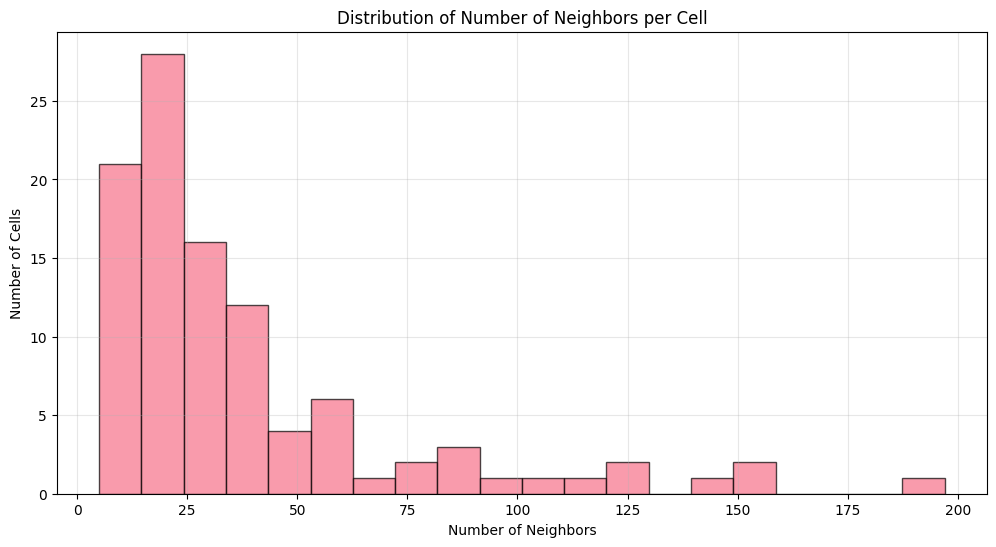


Top 10 cells with most neighbors:
--------------------------------------------------

Cell: TRVBIE04624A31
Number of neighbors: 197
Neighbors: ['TRVBIE04005A31', 'TRVBIE04051A21', 'TRVBIE04051A31', 'TRVBIE04114A11', 'TRVBIE04181A21', 'TRVBIE04286A41', 'TRVBIE04289A21', 'TRVBIE04297X11', 'TRVBIE04317A31', 'TRVBIE04375A11', 'TRVBIE04375A21', 'TRVBIE04376A11', 'TRVBIE04376A21', 'TRVBIE04376A31', 'TRVBIE04498A21', 'TRVBIE04498A31', 'TRVBIE04503A31', 'TRVBIE04561A11', 'TRVBIE04561A21', 'TRVBIE04561A31', 'TRVBIE04624A11', 'TRVBIE04624A21', 'TRVBIE04735A11', 'TRVBIE04735A31', 'TRVBIE04814D11', 'TRVBIE04814D21', 'TRVBIE04814D31', 'TRVBIE04814D41', 'TRVBIE04837B31', 'TRVBIE04862A31', 'TRVBIE04947A21', 'TRVBIE04955A21', 'TRVBIE04955A31', 'TRVBIE04963A21', 'TRVBIE04963A31', 'TRVBIE04986A21', 'TRVBIE04999C11', 'TRVBIE04999C21', 'TRVBIE04999C31', 'TRVBIE05339B31', 'TRVBIE05350D31', 'TRVBIE05355G11', 'TRVBIE05355G21', 'TRVBIE05355G31', 'TRVBIE05356C31', 'TRVBIE05365A11', 'TRVBIE05365A21', 'TRVBIE05

In [40]:
# Detailed analysis and visualization of cell-neighbor relationships

# Create a DataFrame for better analysis
cell_neighbor_details = []
for cell, neighbors in cell_neighbor_mapping.items():
    for neighbor in neighbors:
        cell_neighbor_details.append({
            'CELL': cell,
            'NEIGHBOR_CELL': neighbor,
            'NEIGHBOR_COUNT': len(neighbors)
        })

cell_neighbor_df = pd.DataFrame(cell_neighbor_details)

# Plot distribution of neighbor counts
plt.figure(figsize=(12, 6))
neighbor_counts.hist(bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Number of Neighbors per Cell')
plt.xlabel('Number of Neighbors')
plt.ylabel('Number of Cells')
plt.grid(True, alpha=0.3)
plt.show()

# Show top cells with most neighbors
print("\nTop 10 cells with most neighbors:")
print("-" * 50)
top_cells = neighbor_counts.nlargest(10)
for cell, count in top_cells.items():
    neighbors_list = cell_neighbor_mapping[cell]
    print(f"\nCell: {cell}")
    print(f"Number of neighbors: {count}")
    print(f"Neighbors: {sorted(neighbors_list.tolist())}")

# Show cells with only one neighbor
single_neighbor_cells = neighbor_counts[neighbor_counts == 1]
if len(single_neighbor_cells) > 0:
    print(f"\nCells with only 1 neighbor ({len(single_neighbor_cells)} cells):")
    print("-" * 50)
    for cell in single_neighbor_cells.index[:10]:  # Show first 10
        neighbor = cell_neighbor_mapping[cell][0]
        print(f"Cell: {cell} -> Neighbor: {neighbor}")
    if len(single_neighbor_cells) > 10:
        print(f"... and {len(single_neighbor_cells) - 10} more cells with single neighbors")

# Create a summary table
print(f"\nSUMMARY TABLE - Cell Neighbor Relationships:")
print("-" * 80)
summary_df = pd.DataFrame({
    'Cell': cell_neighbor_mapping.index,
    'Neighbor_Count': neighbor_counts.values,
    'Neighbors': [', '.join(sorted(neighbors.tolist())) for neighbors in cell_neighbor_mapping.values]
})

# Display first 10 rows of summary
print(summary_df.head(10).to_string(index=False, max_colwidth=60))

In [41]:
# Analyze neighbors of each cell for different time periods
print("="*80)
print("CELL NEIGHBORS ACROSS DIFFERENT TIME PERIODS")
print("="*80)

# First, ensure PERIOD_START_TIME is in datetime format for df_merged
print("Checking and converting PERIOD_START_TIME format...")
print(f"Current df_merged PERIOD_START_TIME dtype: {df_merged['PERIOD_START_TIME'].dtype}")

# Convert to datetime if not already
if not pd.api.types.is_datetime64_any_dtype(df_merged['PERIOD_START_TIME']):
    print("Converting PERIOD_START_TIME to datetime...")
    df_merged['PERIOD_START_TIME'] = pd.to_datetime(df_merged['PERIOD_START_TIME'], format='%m-%d-%Y %H:%M')
    print(f"Converted dtype: {df_merged['PERIOD_START_TIME'].dtype}")
else:
    print("PERIOD_START_TIME is already in datetime format")

# Create time-based groupings
df_merged['Date'] = df_merged['PERIOD_START_TIME'].dt.date
df_merged['Hour'] = df_merged['PERIOD_START_TIME'].dt.hour
df_merged['TimeSlot'] = df_merged['PERIOD_START_TIME'].dt.floor('6H')  # 6-hour slots

# Analyze neighbors by different time granularities
def analyze_neighbors_by_time(df, time_col, time_name):
    print(f"\n{'-'*60}")
    print(f"NEIGHBORS BY {time_name}")
    print(f"{'-'*60}")
    
    # Group by time and cell, get unique neighbors
    time_cell_neighbors = df.groupby([time_col, 'CELL'])['NEIGHBOR_CELL'].apply(lambda x: set(x.unique())).reset_index()
    time_cell_neighbors.columns = [time_name, 'CELL', 'NEIGHBORS']
    
    # Count neighbors per cell per time period
    time_cell_neighbors['NEIGHBOR_COUNT'] = time_cell_neighbors['NEIGHBORS'].apply(len)
    
    return time_cell_neighbors

# Analyze by hour
hourly_neighbors = analyze_neighbors_by_time(df_merged, 'Hour', 'Hour')

# Analyze by date
daily_neighbors = analyze_neighbors_by_time(df_merged, 'Date', 'Date')

# Analyze by 6-hour time slots
timeslot_neighbors = analyze_neighbors_by_time(df_merged, 'TimeSlot', 'TimeSlot')

print(f"Hourly analysis shape: {hourly_neighbors.shape}")
print(f"Daily analysis shape: {daily_neighbors.shape}")
print(f"6-hour slot analysis shape: {timeslot_neighbors.shape}")

CELL NEIGHBORS ACROSS DIFFERENT TIME PERIODS
Checking and converting PERIOD_START_TIME format...
Current df_merged PERIOD_START_TIME dtype: object
Converting PERIOD_START_TIME to datetime...
Converted dtype: datetime64[ns]

------------------------------------------------------------
NEIGHBORS BY Hour
------------------------------------------------------------

------------------------------------------------------------
NEIGHBORS BY Date
------------------------------------------------------------

------------------------------------------------------------
NEIGHBORS BY TimeSlot
------------------------------------------------------------
Hourly analysis shape: (1938, 4)
Daily analysis shape: (204, 4)
6-hour slot analysis shape: (408, 4)


In [30]:
# Verify the datetime conversion and show sample data
print("\nVERIFICATION OF DATETIME CONVERSION")
print("="*50)
print(f"df_merged shape: {df_merged.shape}")
print(f"PERIOD_START_TIME dtype: {df_merged['PERIOD_START_TIME'].dtype}")
print(f"Date range: {df_merged['PERIOD_START_TIME'].min()} to {df_merged['PERIOD_START_TIME'].max()}")

print(f"\nSample of hourly neighbors data:")
print(hourly_neighbors.head())

print(f"\nUnique hours in dataset: {sorted(df_merged['Hour'].unique())}")
print(f"Number of unique cells: {df_merged['CELL'].nunique()}")
print(f"Number of unique neighbor cells: {df_merged['NEIGHBOR_CELL'].nunique()}")

# Show some sample neighbor relationships by hour
sample_cell = df_merged['CELL'].value_counts().index[0]  # Most frequent cell
sample_hourly = hourly_neighbors[hourly_neighbors['CELL'] == sample_cell]
print(f"\nSample: Neighbors for cell '{sample_cell}' by hour:")
for _, row in sample_hourly.head().iterrows():
    neighbors_list = sorted(list(row['NEIGHBORS']))
    print(f"  Hour {row['Hour']:02d}: {len(neighbors_list)} neighbors - {neighbors_list[:3]}{'...' if len(neighbors_list) > 3 else ''}")


VERIFICATION OF DATETIME CONVERSION
df_merged shape: (281633, 27)
PERIOD_START_TIME dtype: datetime64[ns]
Date range: 2025-09-02 14:00:00 to 2025-09-03 08:15:00

Sample of hourly neighbors data:
   Hour            CELL                                          NEIGHBORS  \
0     0  TRVBIE04310A11  {TRVDIE04310A21, TRVLIE04310A21, TRVLIE04624A2...   
1     0  TRVBIE04310A21  {TRVBIE04005A21, TRVBIE04177A11, TRVBLA34003A3...   
2     0  TRVBIE04310A31  {TRVBIE04310A11, TRVBIE05276B11, TRVBIE04624A1...   
3     0  TRVBIE04376A11  {TRVBIE04376A31, TRVBIE04624A11, TRVBIE04999C3...   
4     0  TRVBIE04376A21  {TRVLIE04999C21, TRVBIE04376A31, TRVBIE04177A1...   

   NEIGHBOR_COUNT  
0              19  
1              74  
2              17  
3              12  
4              55  

Unique hours in dataset: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), n

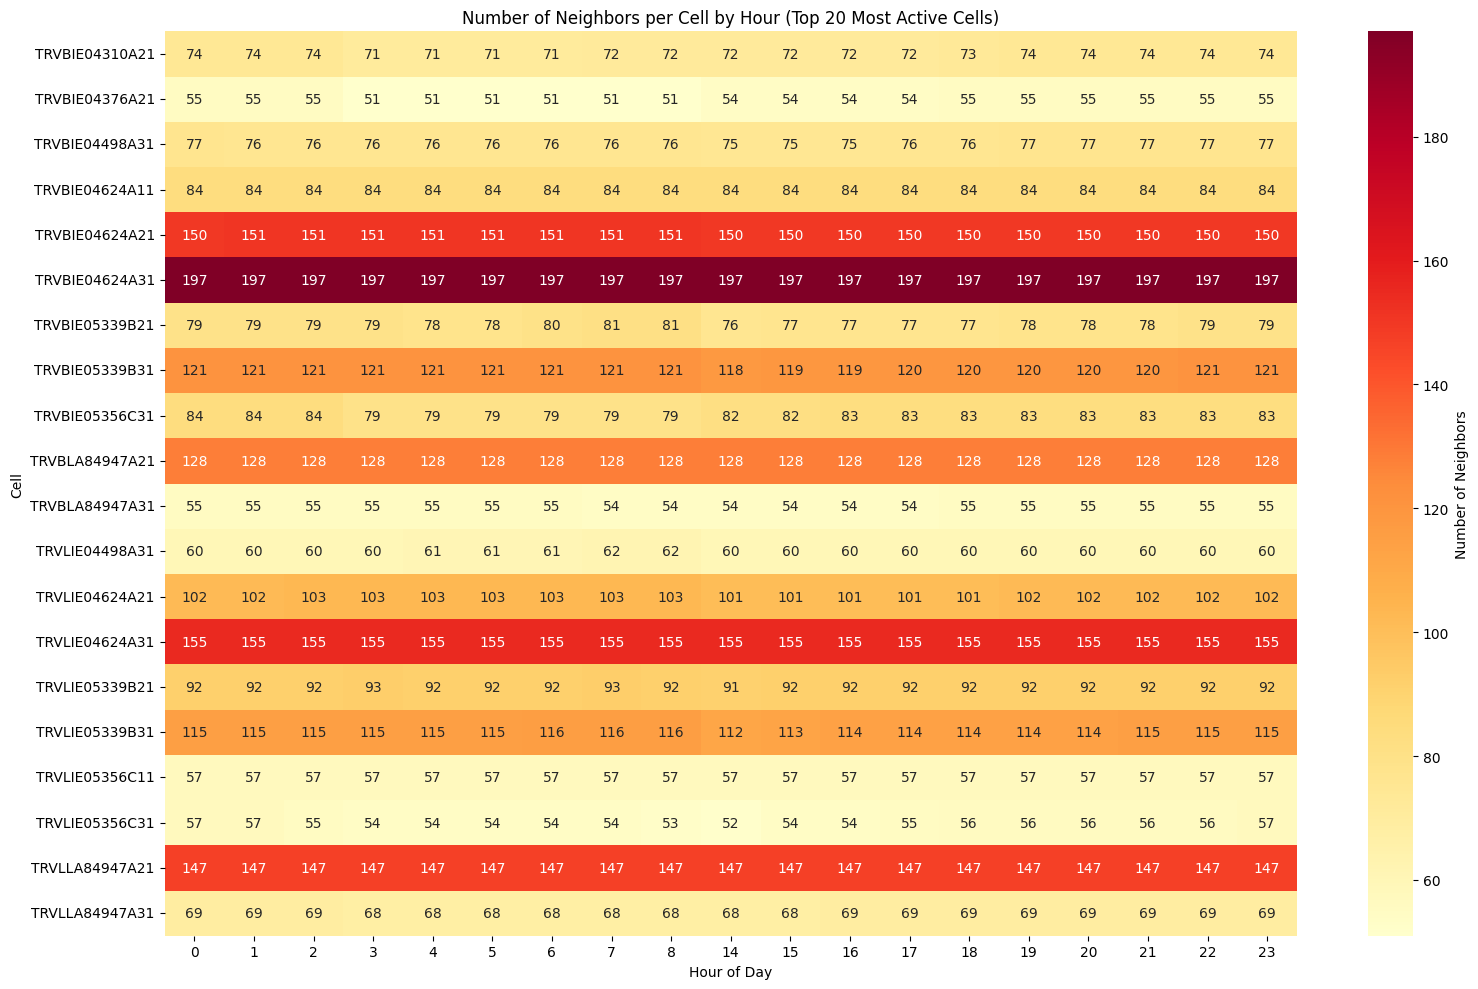

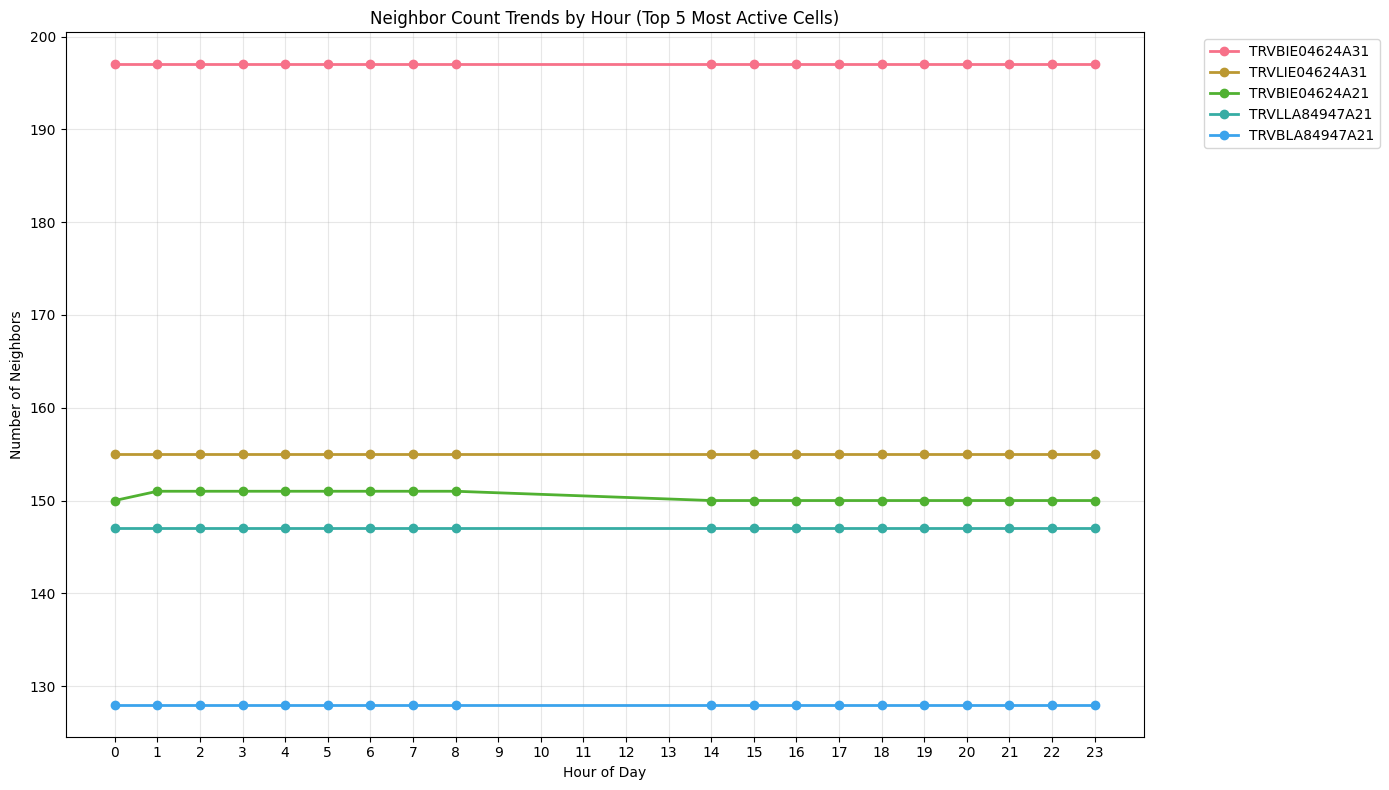

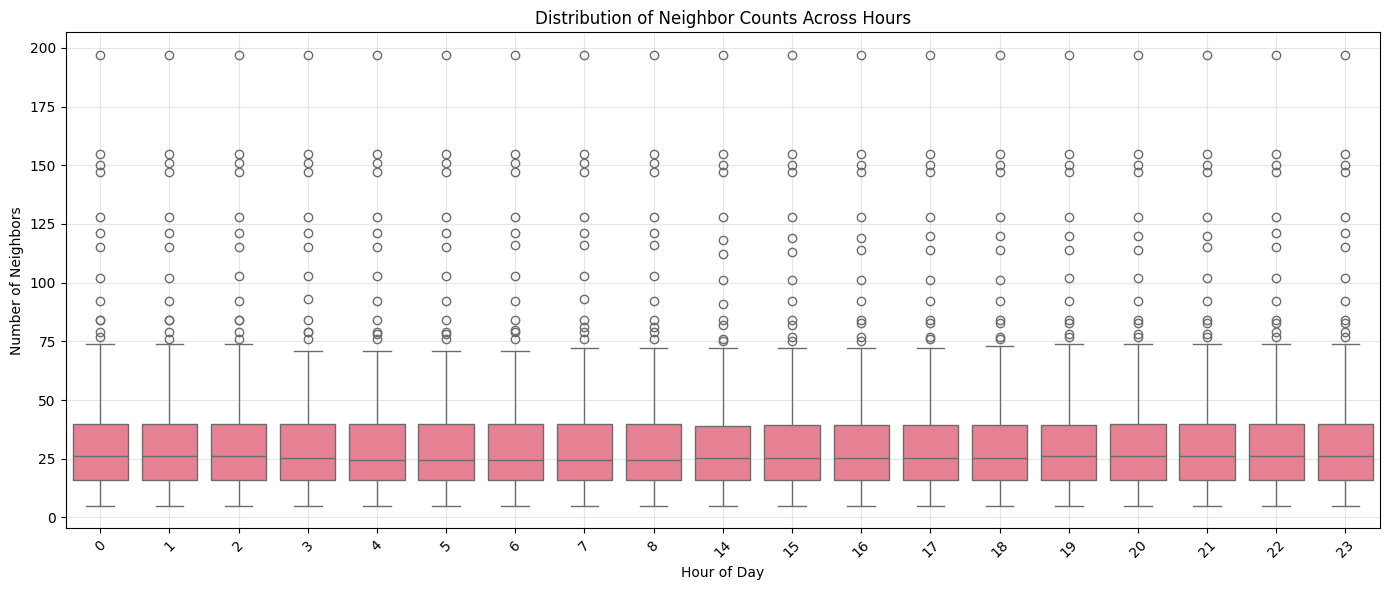

In [31]:
# Visualize neighbor counts across time periods

# 1. Heatmap of neighbor counts by hour and cell (top 20 cells)
top_cells = df_merged['CELL'].value_counts().head(20).index
hourly_subset = hourly_neighbors[hourly_neighbors['CELL'].isin(top_cells)]

# Create pivot table for heatmap
hourly_pivot = hourly_subset.pivot(index='CELL', columns='Hour', values='NEIGHBOR_COUNT')
hourly_pivot = hourly_pivot.fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(hourly_pivot, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Number of Neighbors'})
plt.title('Number of Neighbors per Cell by Hour (Top 20 Most Active Cells)')
plt.xlabel('Hour of Day')
plt.ylabel('Cell')
plt.tight_layout()
plt.show()

# 2. Line plot showing neighbor count trends by hour for selected cells
plt.figure(figsize=(14, 8))
for i, cell in enumerate(top_cells[:5]):  # Top 5 cells
    cell_hourly = hourly_neighbors[hourly_neighbors['CELL'] == cell]
    plt.plot(cell_hourly['Hour'], cell_hourly['NEIGHBOR_COUNT'], 
             marker='o', label=cell, linewidth=2, markersize=6)

plt.title('Neighbor Count Trends by Hour (Top 5 Most Active Cells)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Neighbors')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# 3. Box plot of neighbor counts across hours
plt.figure(figsize=(14, 6))
sns.boxplot(data=hourly_neighbors, x='Hour', y='NEIGHBOR_COUNT')
plt.title('Distribution of Neighbor Counts Across Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Neighbors')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

DETAILED NEIGHBOR CHANGES ANALYSIS

Neighbor changes for cell: TRVBIE04624A31
--------------------------------------------------
Hour 0: 197 neighbors - ['TRVBIE04005A31', 'TRVBIE04051A21', 'TRVBIE04051A31', 'TRVBIE04114A11', 'TRVBIE04181A21', 'TRVBIE04286A41', 'TRVBIE04289A21', 'TRVBIE04297X11', 'TRVBIE04317A31', 'TRVBIE04375A11', 'TRVBIE04375A21', 'TRVBIE04376A11', 'TRVBIE04376A21', 'TRVBIE04376A31', 'TRVBIE04498A21', 'TRVBIE04498A31', 'TRVBIE04503A31', 'TRVBIE04561A11', 'TRVBIE04561A21', 'TRVBIE04561A31', 'TRVBIE04624A11', 'TRVBIE04624A21', 'TRVBIE04735A11', 'TRVBIE04735A31', 'TRVBIE04814D11', 'TRVBIE04814D21', 'TRVBIE04814D31', 'TRVBIE04814D41', 'TRVBIE04837B31', 'TRVBIE04862A31', 'TRVBIE04947A21', 'TRVBIE04955A21', 'TRVBIE04955A31', 'TRVBIE04963A21', 'TRVBIE04963A31', 'TRVBIE04986A21', 'TRVBIE04999C11', 'TRVBIE04999C21', 'TRVBIE04999C31', 'TRVBIE05339B31', 'TRVBIE05350D31', 'TRVBIE05355G11', 'TRVBIE05355G21', 'TRVBIE05355G31', 'TRVBIE05356C31', 'TRVBIE05365A11', 'TRVBIE05365A21', 

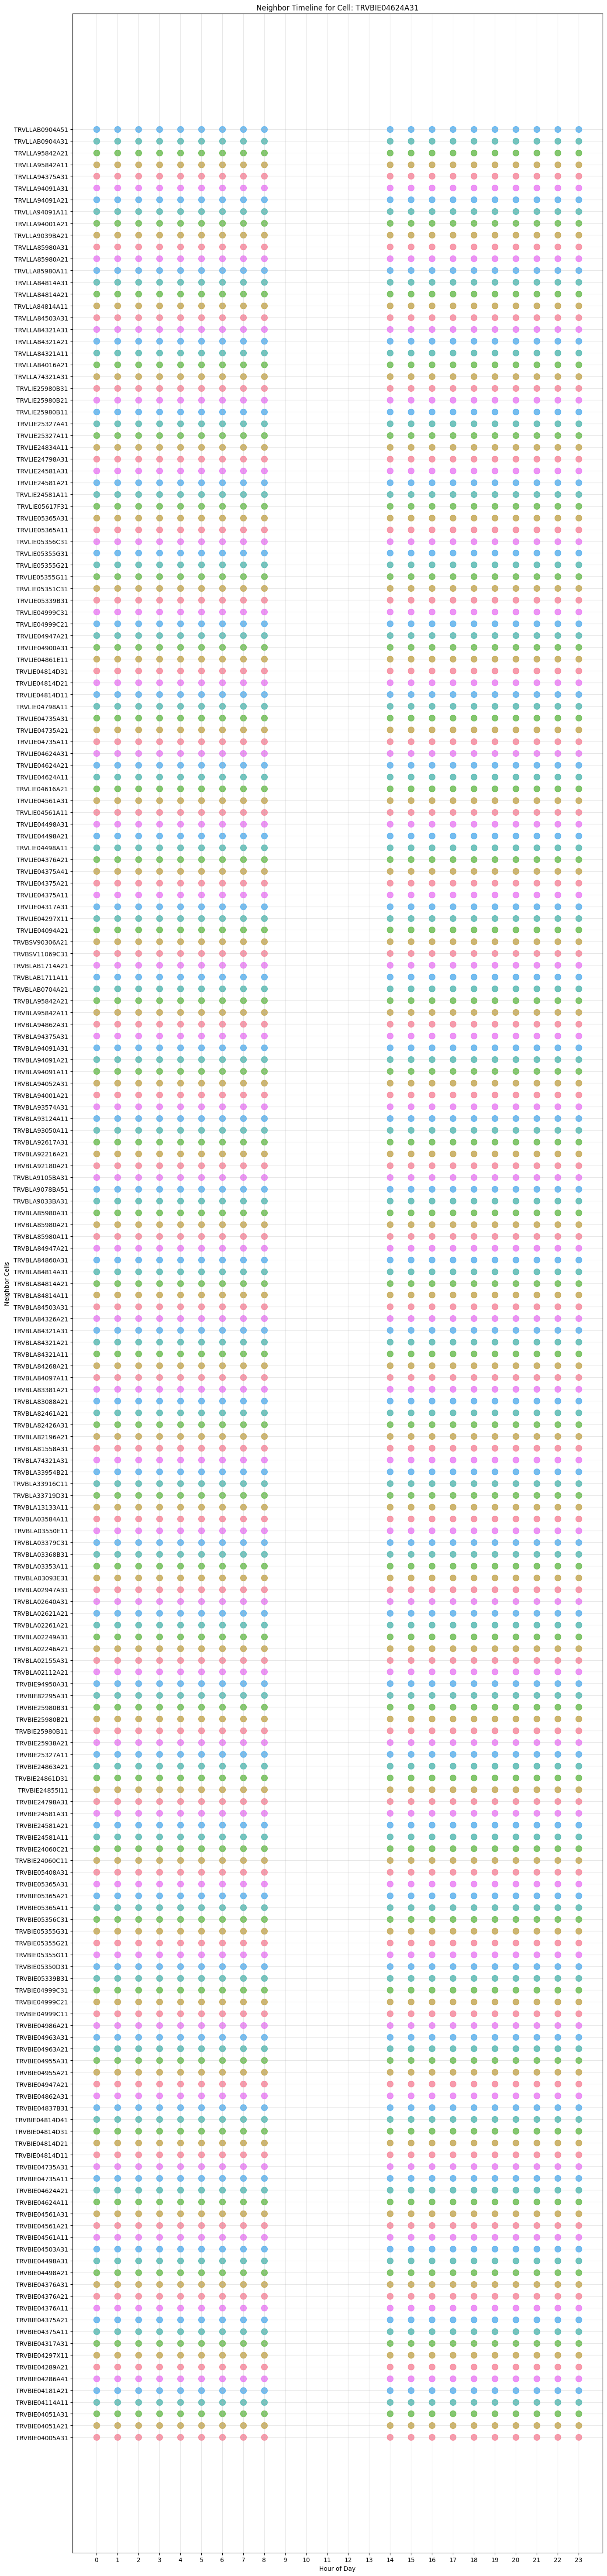

In [32]:
# Detailed neighbor changes over time analysis

# 4. Analyze how neighbors change for specific cells over time
def analyze_neighbor_changes(cell_name, time_df, time_col):
    """Analyze how neighbors change for a specific cell over time"""
    cell_data = time_df[time_df['CELL'] == cell_name].copy()
    cell_data = cell_data.sort_values(time_col)
    
    print(f"\nNeighbor changes for cell: {cell_name}")
    print("-" * 50)
    
    for _, row in cell_data.iterrows():
        neighbors_list = sorted(list(row['NEIGHBORS']))
        print(f"{time_col} {row[time_col]}: {len(neighbors_list)} neighbors - {neighbors_list}")
    
    return cell_data

# Analyze neighbor changes for top 3 cells across hours
print("DETAILED NEIGHBOR CHANGES ANALYSIS")
print("="*80)

top_3_cells = top_cells[:3]
for cell in top_3_cells:
    analyze_neighbor_changes(cell, hourly_neighbors, 'Hour')

# 5. Create a timeline visualization showing neighbor additions/removals
def create_neighbor_timeline(cell_name):
    """Create timeline showing when neighbors are added/removed"""
    cell_hourly = hourly_neighbors[hourly_neighbors['CELL'] == cell_name].sort_values('Hour')
    
    if len(cell_hourly) == 0:
        print(f"No data found for cell {cell_name}")
        return
    
    timeline_data = []
    all_neighbors = set()
    
    for _, row in cell_hourly.iterrows():
        hour = row['Hour']
        neighbors = row['NEIGHBORS']
        all_neighbors.update(neighbors)
        
        for neighbor in neighbors:
            timeline_data.append({
                'Hour': hour,
                'Neighbor': neighbor,
                'Status': 'Active'
            })
    
    timeline_df = pd.DataFrame(timeline_data)
    
    # Create timeline plot
    fig, ax = plt.subplots(figsize=(14, max(6, len(all_neighbors) * 0.3)))
    
    # Create scatter plot
    for i, neighbor in enumerate(sorted(all_neighbors)):
        neighbor_data = timeline_df[timeline_df['Neighbor'] == neighbor]
        ax.scatter(neighbor_data['Hour'], [i] * len(neighbor_data), 
                  s=100, alpha=0.7, label=neighbor if len(all_neighbors) <= 10 else "")
    
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Neighbor Cells')
    ax.set_title(f'Neighbor Timeline for Cell: {cell_name}')
    ax.set_yticks(range(len(all_neighbors)))
    ax.set_yticklabels(sorted(all_neighbors))
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(0, 24))
    
    if len(all_neighbors) <= 10:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
    return timeline_df

# Create timeline for the most active cell
most_active_cell = top_cells[0]
print(f"\nCreating neighbor timeline for most active cell: {most_active_cell}")
timeline_data = create_neighbor_timeline(most_active_cell)


SUMMARY STATISTICS - NEIGHBOR VARIATIONS ACROSS TIME
Top 10 cells with highest neighbor variation:
--------------------------------------------------
          CELL  Total_Unique_Neighbors  Avg_Neighbors_Per_Hour  Min_Neighbors  Max_Neighbors  Neighbor_Variation  Hours_Active
TRVBIE05339B21                      82               78.421053             76             81                   5            19
TRVBIE05356C31                      84               81.789474             79             84                   5            19
TRVLIE05356C31                      57               54.947368             52             57                   5            19
TRVBIE04376A21                      55               53.526316             51             55                   4            19
TRVDIE04310A21                      36               34.736842             32             36                   4            19
TRVDIE04624A21                      48               46.947368             44          

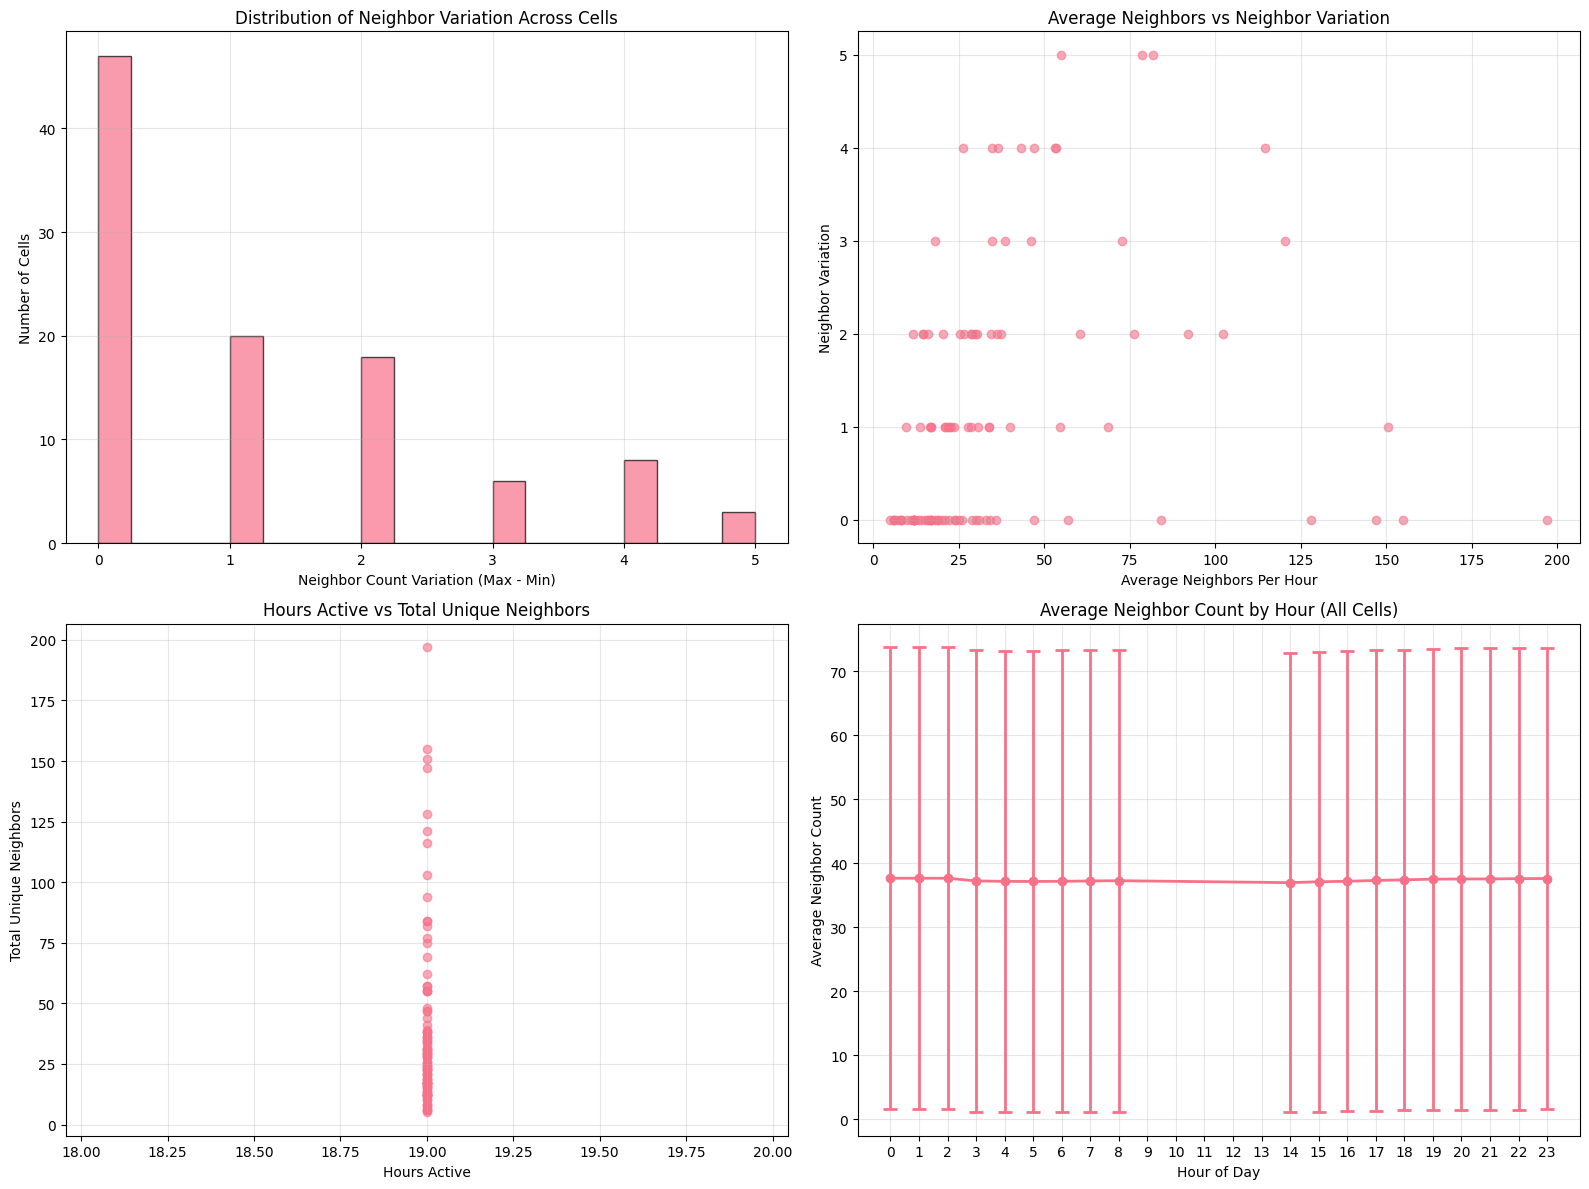


OVERALL SUMMARY:
Total cells analyzed: 102
Average neighbor variation per cell: 1.19
Cells with no neighbor variation: 47
Cells with high variation (>5): 0


In [33]:
# 6. Summary statistics of neighbor variations across time
print("\n" + "="*80)
print("SUMMARY STATISTICS - NEIGHBOR VARIATIONS ACROSS TIME")
print("="*80)

# Calculate statistics for each cell across all hours
cell_stats = []
for cell in hourly_neighbors['CELL'].unique():
    cell_data = hourly_neighbors[hourly_neighbors['CELL'] == cell]
    
    neighbor_counts = cell_data['NEIGHBOR_COUNT']
    all_neighbors = set()
    for neighbors_set in cell_data['NEIGHBORS']:
        all_neighbors.update(neighbors_set)
    
    stats = {
        'CELL': cell,
        'Total_Unique_Neighbors': len(all_neighbors),
        'Avg_Neighbors_Per_Hour': neighbor_counts.mean(),
        'Min_Neighbors': neighbor_counts.min(),
        'Max_Neighbors': neighbor_counts.max(),
        'Neighbor_Variation': neighbor_counts.max() - neighbor_counts.min(),
        'Hours_Active': len(cell_data)
    }
    cell_stats.append(stats)

cell_stats_df = pd.DataFrame(cell_stats)

print("Top 10 cells with highest neighbor variation:")
print("-" * 50)
top_variation = cell_stats_df.nlargest(10, 'Neighbor_Variation')
print(top_variation.to_string(index=False))

# 7. Visualize neighbor variation patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Neighbor variation distribution
axes[0,0].hist(cell_stats_df['Neighbor_Variation'], bins=20, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Neighbor Variation Across Cells')
axes[0,0].set_xlabel('Neighbor Count Variation (Max - Min)')
axes[0,0].set_ylabel('Number of Cells')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Average neighbors vs variation
axes[0,1].scatter(cell_stats_df['Avg_Neighbors_Per_Hour'], cell_stats_df['Neighbor_Variation'], alpha=0.6)
axes[0,1].set_title('Average Neighbors vs Neighbor Variation')
axes[0,1].set_xlabel('Average Neighbors Per Hour')
axes[0,1].set_ylabel('Neighbor Variation')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Total unique neighbors vs hours active
axes[1,0].scatter(cell_stats_df['Hours_Active'], cell_stats_df['Total_Unique_Neighbors'], alpha=0.6)
axes[1,0].set_title('Hours Active vs Total Unique Neighbors')
axes[1,0].set_xlabel('Hours Active')
axes[1,0].set_ylabel('Total Unique Neighbors')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Hourly average neighbor counts across all cells
hourly_avg = hourly_neighbors.groupby('Hour')['NEIGHBOR_COUNT'].agg(['mean', 'std']).reset_index()
axes[1,1].errorbar(hourly_avg['Hour'], hourly_avg['mean'], yerr=hourly_avg['std'], 
                   marker='o', capsize=5, capthick=2, linewidth=2)
axes[1,1].set_title('Average Neighbor Count by Hour (All Cells)')
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_ylabel('Average Neighbor Count')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

print(f"\nOVERALL SUMMARY:")
print(f"Total cells analyzed: {len(cell_stats_df)}")
print(f"Average neighbor variation per cell: {cell_stats_df['Neighbor_Variation'].mean():.2f}")
print(f"Cells with no neighbor variation: {len(cell_stats_df[cell_stats_df['Neighbor_Variation'] == 0])}")
print(f"Cells with high variation (>5): {len(cell_stats_df[cell_stats_df['Neighbor_Variation'] > 5])}")

In [34]:
df_filterd = df_merged[['PERIOD_START_TIME', 'SPECTRUM', 'SITE', 'CELL', 'NEIGHBOR_CELL', 'TARGET SITE', 'CAT', 'HoRel_PMHOEXEATTLTEINTRAF', 'Avg Nr RRC Connected Users', 'Downlink PRB Utilization']]

In [43]:
# XGBoost Model for Predicting Downlink PRB Utilization
print("="*80)
print("XGBOOST MODEL FOR DOWNLINK PRB UTILIZATION PREDICTION")
print("="*80)

# Install required packages (run once)
# !pip install xgboost scikit-learn

import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Load KPI data
kpi_df = pd.read_csv('docs/KPI.csv')

print(f"KPI Dataset shape: {kpi_df.shape}")
print(f"\nColumns: {kpi_df.columns.tolist()}")
print(f"\nFirst few rows:")
print(kpi_df.head())

# Check for missing values
print(f"\nMissing values:")
print(kpi_df.isnull().sum())

# Basic statistics of target variable
print(f"\nDownlink PRB Utilization statistics:")
print(kpi_df['Downlink PRB Utilization'].describe())

XGBOOST MODEL FOR DOWNLINK PRB UTILIZATION PREDICTION
KPI Dataset shape: (110904, 18)

Columns: ['PERIOD_START_TIME', 'SPECTRUM', 'REGION', 'MARKET', 'TAC', 'SITE', 'ENODEB', 'SECTOR', 'CELL', 'Avg Nr RRC Connected Users', 'Downlink PRB Utilization', 'VoLTE Drop Rate (%)', 'ERAB Drop Rate eNodeB (%)', 'ERAB Drops eNodeB', 'ERAB Initial Access Failure Rate (%)', 'ERAB Initial Access Failures (c)', 'RRC Failures', 'RRC Failure Rate (%)']

First few rows:
  PERIOD_START_TIME SPECTRUM REGION MARKET      TAC         SITE  \
0  08/24/2025 11:00      600  South    TRV  7715360  TRVIE04624A   
1  08/24/2025 11:00      PCS  South    TRV  7715360  TRVLA94091A   
2  08/24/2025 11:00      AWS  South    TRV  7715360  TRVIE04923A   
3  08/24/2025 11:00      AWS  South    TRV  7715360  TRVIE04376A   
4  08/24/2025 11:00      AWS  South    TRV  7715360  TRVIE04376A   

          ENODEB        SECTOR            CELL  Avg Nr RRC Connected Users  \
0   TRVMIE04624A  TRVIE04624A2  TRVEIE04624A21          

In [45]:
# Data Preprocessing and Feature Engineering
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Create a copy for processing
df_xgb = kpi_df.copy()

# Convert timestamp to datetime and extract time features - handle multiple formats
print("Converting timestamp to datetime...")
print(f"Sample timestamps before conversion:")
print(df_xgb['PERIOD_START_TIME'].head())

# Try multiple date formats to handle inconsistencies
try:
    # First try with mixed format detection
    df_xgb['PERIOD_START_TIME'] = pd.to_datetime(df_xgb['PERIOD_START_TIME'], format='mixed', dayfirst=False)
except:
    try:
        # Try common format 1: MM/DD/YYYY HH:MM
        df_xgb['PERIOD_START_TIME'] = pd.to_datetime(df_xgb['PERIOD_START_TIME'], format='%m/%d/%Y %H:%M')
    except:
        try:
            # Try common format 2: MM-DD-YYYY HH:MM
            df_xgb['PERIOD_START_TIME'] = pd.to_datetime(df_xgb['PERIOD_START_TIME'], format='%m-%d-%Y %H:%M')
        except:
            # Last resort: let pandas infer the format
            df_xgb['PERIOD_START_TIME'] = pd.to_datetime(df_xgb['PERIOD_START_TIME'], infer_datetime_format=True)

print(f"Sample timestamps after conversion:")
print(df_xgb['PERIOD_START_TIME'].head())

df_xgb['Hour'] = df_xgb['PERIOD_START_TIME'].dt.hour
df_xgb['Day'] = df_xgb['PERIOD_START_TIME'].dt.day
df_xgb['DayOfWeek'] = df_xgb['PERIOD_START_TIME'].dt.dayofweek
df_xgb['IsWeekend'] = (df_xgb['DayOfWeek'] >= 5).astype(int)

# Define target variable
target = 'Downlink PRB Utilization'

# Define feature columns (all columns except target and identifier columns)
exclude_cols = [target, 'PERIOD_START_TIME', 'SITE', 'ENODEB', 'CELL']
feature_cols = [col for col in df_xgb.columns if col not in exclude_cols]

print(f"Target variable: {target}")
print(f"Feature columns ({len(feature_cols)}): {feature_cols}")

# Handle missing values
print(f"\nHandling missing values...")
for col in feature_cols:
    if df_xgb[col].dtype in ['object']:
        # For categorical columns, fill with mode
        df_xgb[col] = df_xgb[col].fillna(df_xgb[col].mode()[0] if not df_xgb[col].mode().empty else 'Unknown')
    else:
        # For numerical columns, fill with median
        df_xgb[col] = df_xgb[col].fillna(df_xgb[col].median())

# Remove rows where target is missing
df_xgb = df_xgb.dropna(subset=[target])

print(f"Dataset shape after preprocessing: {df_xgb.shape}")

# Encode categorical variables
categorical_cols = df_xgb[feature_cols].select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

print(f"\nEncoding categorical variables: {categorical_cols}")
for col in categorical_cols:
    le = LabelEncoder()
    df_xgb[col] = le.fit_transform(df_xgb[col].astype(str))
    label_encoders[col] = le

print(f"Final dataset shape: {df_xgb.shape}")
print(f"Feature statistics after preprocessing:")
print(df_xgb[feature_cols].describe())


DATA PREPROCESSING
Converting timestamp to datetime...
Sample timestamps before conversion:
0    08/24/2025 11:00
1    08/24/2025 11:00
2    08/24/2025 11:00
3    08/24/2025 11:00
4    08/24/2025 11:00
Name: PERIOD_START_TIME, dtype: object
Sample timestamps after conversion:
0   2025-08-24 11:00:00
1   2025-08-24 11:00:00
2   2025-08-24 11:00:00
3   2025-08-24 11:00:00
4   2025-08-24 11:00:00
Name: PERIOD_START_TIME, dtype: datetime64[ns]
Target variable: Downlink PRB Utilization
Feature columns (17): ['SPECTRUM', 'REGION', 'MARKET', 'TAC', 'SECTOR', 'Avg Nr RRC Connected Users', 'VoLTE Drop Rate (%)', 'ERAB Drop Rate eNodeB (%)', 'ERAB Drops eNodeB', 'ERAB Initial Access Failure Rate (%)', 'ERAB Initial Access Failures (c)', 'RRC Failures', 'RRC Failure Rate (%)', 'Hour', 'Day', 'DayOfWeek', 'IsWeekend']

Handling missing values...
Dataset shape after preprocessing: (110904, 22)

Encoding categorical variables: ['SPECTRUM', 'REGION', 'MARKET', 'SECTOR']
Final dataset shape: (110904,

In [47]:
# Prepare data for modeling
print("\n" + "="*60)
print("MODEL TRAINING")
print("="*60)

# Prepare features and target
X = df_xgb[feature_cols]
y = df_xgb[target]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:")
print(y.describe())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")

# Scale features (optional for XGBoost, but can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrames to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols)

# Initialize XGBoost regressor - Windows-compatible settings
try:
    # Try with parallel processing
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=1,  # Use single job to avoid Windows issues
        verbosity=0  # Reduce output to avoid subprocess issues
    )
    print("XGBoost model initialized successfully")
except Exception as e:
    print(f"Error initializing XGBoost: {e}")
    # Fallback to basic configuration
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        verbosity=0
    )
    print("Using fallback XGBoost configuration")

# Hyperparameter tuning with GridSearchCV - Windows-compatible
param_grid = {
    'n_estimators': [100, 200],  # Reduced for faster execution
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("Performing hyperparameter tuning...")
try:
    grid_search = GridSearchCV(
        xgb_model, 
        param_grid, 
        cv=3,  # Reduced CV folds for Windows compatibility
        scoring='neg_mean_squared_error',
        n_jobs=1,  # Use single job to avoid Windows issues
        verbose=1
    )
    print("GridSearchCV initialized successfully")
except Exception as e:
    print(f"GridSearchCV error: {e}")
    # Fallback: manual parameter selection
    print("Using manual parameter selection...")
    xgb_model.set_params(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8
    )
    grid_search = None

# Fit the model (using original features, not scaled, as XGBoost handles scaling internally)
if grid_search is not None:
    print("Training with GridSearchCV...")
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_xgb = grid_search.best_estimator_
    print(f"\nBest parameters: {grid_search.best_params_}")
    print(f"Best CV score: {-grid_search.best_score_:.4f}")
    
    # Train final model with best parameters
    best_xgb.fit(X_train, y_train)
else:
    print("Training with manual parameters...")
    # Use the manually configured model
    best_xgb = xgb_model
    best_xgb.fit(X_train, y_train)
    print("Model training completed with manual parameters")
    print(f"Model parameters: {best_xgb.get_params()}")


MODEL TRAINING
Features shape: (110904, 17)
Target shape: (110904,)
Target distribution:
count    110904.000000
mean         12.410368
std          15.155011
min           0.000000
25%           3.870000
50%           6.490000
75%          14.730000
max          99.240000
Name: Downlink PRB Utilization, dtype: float64

Train set: (88723, 17), Test set: (22181, 17)
XGBoost model initialized successfully
Performing hyperparameter tuning...
GridSearchCV initialized successfully
Training with GridSearchCV...
Fitting 3 folds for each of 32 candidates, totalling 96 fits

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Best CV score: 33.1646

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Best CV score: 33.1646



MODEL EVALUATION

Training Metrics:
MSE: 23.5793
RMSE: 4.8559
MAE: 2.7362
R²: 0.8978

Testing Metrics:
MSE: 30.6038
RMSE: 5.5321
MAE: 3.1026
R²: 0.8643

Top 10 Most Important Features:
                                 Feature  Importance
5             Avg Nr RRC Connected Users    0.416360
0                               SPECTRUM    0.230614
8                      ERAB Drops eNodeB    0.146970
13                                  Hour    0.060465
4                                 SECTOR    0.054098
14                                   Day    0.024464
15                             DayOfWeek    0.016354
10      ERAB Initial Access Failures (c)    0.014435
7              ERAB Drop Rate eNodeB (%)    0.011410
9   ERAB Initial Access Failure Rate (%)    0.008159

Training Metrics:
MSE: 23.5793
RMSE: 4.8559
MAE: 2.7362
R²: 0.8978

Testing Metrics:
MSE: 30.6038
RMSE: 5.5321
MAE: 3.1026
R²: 0.8643

Top 10 Most Important Features:
                                 Feature  Importance
5         

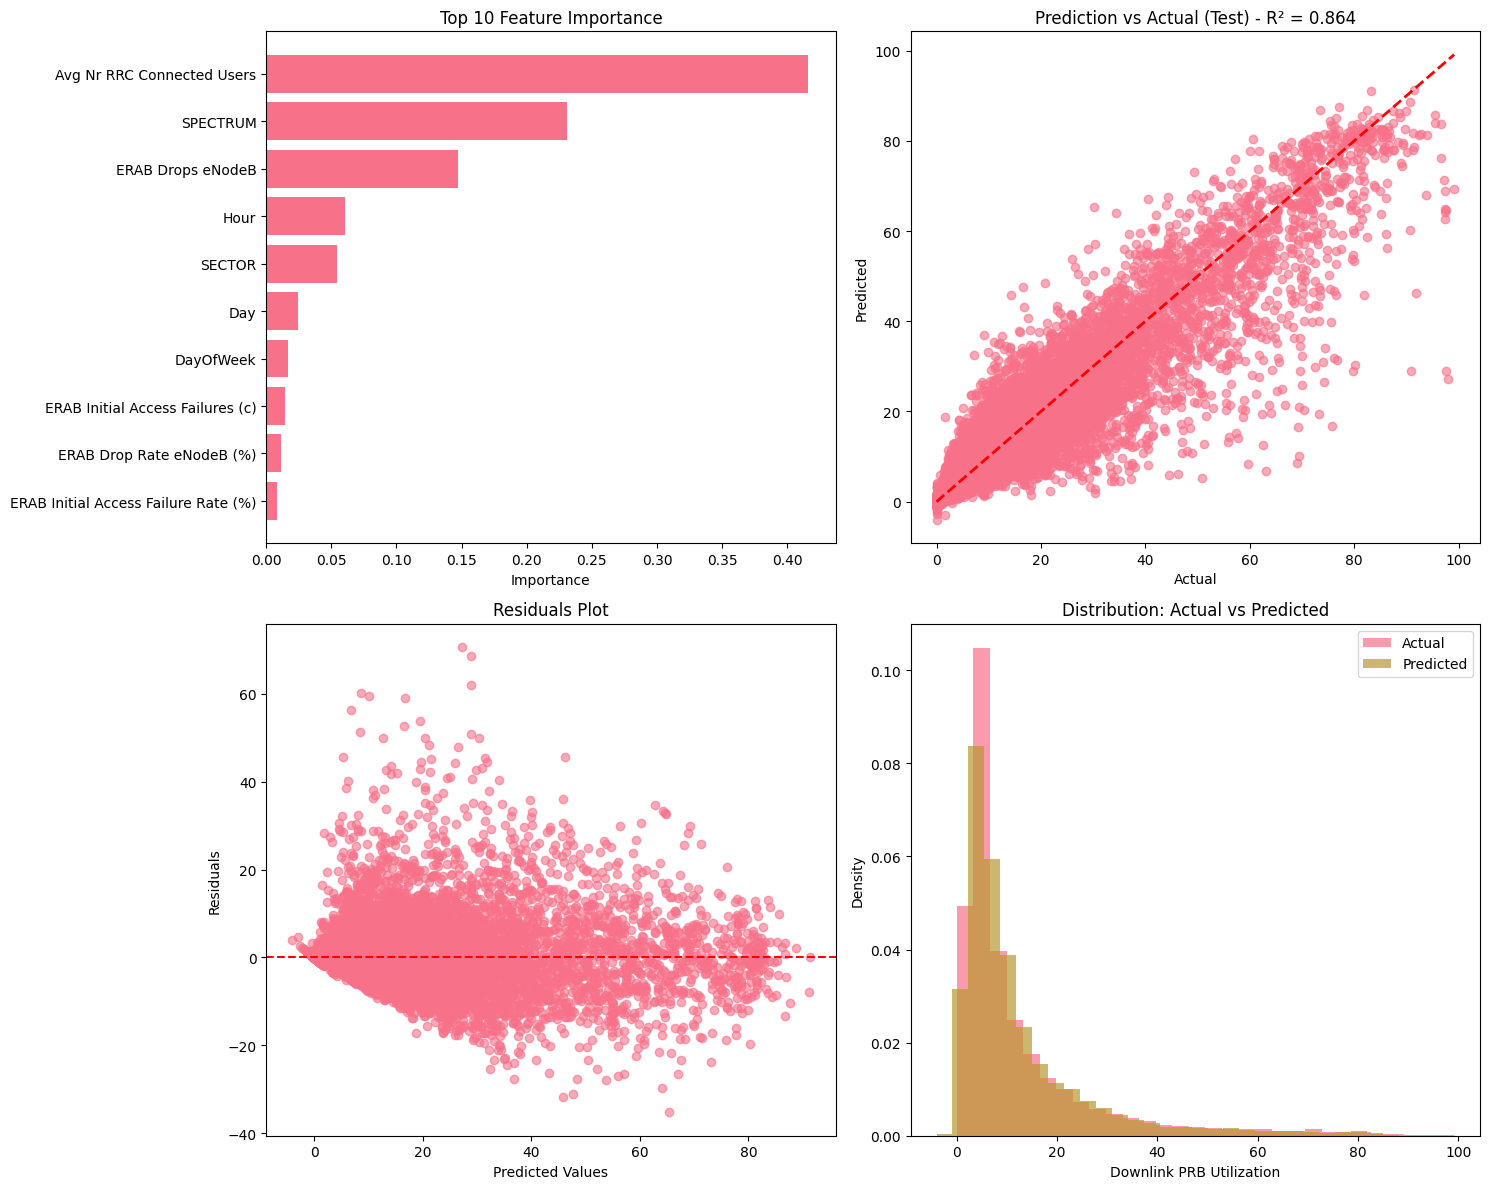

In [48]:
# Model Evaluation and Predictions
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

# Make predictions
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calculate metrics for both sets
train_metrics = calculate_metrics(y_train, y_train_pred, "Training")
test_metrics = calculate_metrics(y_test, y_test_pred, "Testing")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': best_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Feature Importance Plot
axes[0, 0].barh(feature_importance.head(10)['Feature'][::-1], 
                feature_importance.head(10)['Importance'][::-1])
axes[0, 0].set_title('Top 10 Feature Importance')
axes[0, 0].set_xlabel('Importance')

# 2. Prediction vs Actual (Test Set)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')
axes[0, 1].set_title(f'Prediction vs Actual (Test) - R² = {test_metrics["R2"]:.3f}')

# 3. Residuals Plot
residuals = y_test - y_test_pred
axes[1, 0].scatter(y_test_pred, residuals, alpha=0.6)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals Plot')

# 4. Distribution of Predictions vs Actual
axes[1, 1].hist(y_test, bins=30, alpha=0.7, label='Actual', density=True)
axes[1, 1].hist(y_test_pred, bins=30, alpha=0.7, label='Predicted', density=True)
axes[1, 1].set_xlabel('Downlink PRB Utilization')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Distribution: Actual vs Predicted')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [49]:
# Advanced Analysis and Model Insights
print("\n" + "="*60)
print("ADVANCED ANALYSIS")
print("="*60)

# Permutation Importance (more reliable than default feature importance)
print("Calculating permutation importance...")
perm_importance = permutation_importance(best_xgb, X_test, y_test, n_repeats=5, random_state=42)

perm_imp_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_Std': perm_importance.importances_std
}).sort_values('Importance_Mean', ascending=False)

print("\nTop 10 Features by Permutation Importance:")
print(perm_imp_df.head(10))

# Cross-validation scores
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"\nCross-validation RMSE: {np.sqrt(-cv_scores).mean():.4f} (+/- {np.sqrt(-cv_scores).std() * 2:.4f})")

# Prediction intervals analysis
prediction_errors = np.abs(y_test - y_test_pred)
print(f"\nPrediction Error Analysis:")
print(f"Mean Absolute Error: {prediction_errors.mean():.4f}")
print(f"90th percentile error: {np.percentile(prediction_errors, 90):.4f}")
print(f"95th percentile error: {np.percentile(prediction_errors, 95):.4f}")

# Analysis by different segments
print(f"\nModel Performance by Spectrum:")
for spectrum in df_xgb['SPECTRUM'].unique():
    if len(label_encoders) > 0 and 'SPECTRUM' in label_encoders:
        spectrum_encoded = label_encoders['SPECTRUM'].transform([str(spectrum)])[0]
        mask = X_test['SPECTRUM'] == spectrum_encoded
        if mask.sum() > 0:
            spectrum_r2 = r2_score(y_test[mask], y_test_pred[mask])
            spectrum_rmse = np.sqrt(mean_squared_error(y_test[mask], y_test_pred[mask]))
            print(f"  {spectrum}: R² = {spectrum_r2:.3f}, RMSE = {spectrum_rmse:.3f} (n={mask.sum()})")

# Model interpretation plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Permutation Importance
axes[0, 0].barh(perm_imp_df.head(10)['Feature'][::-1], 
                perm_imp_df.head(10)['Importance_Mean'][::-1])
axes[0, 0].set_title('Top 10 Permutation Feature Importance')
axes[0, 0].set_xlabel('Importance')

# 2. Prediction Error Distribution
axes[0, 1].hist(prediction_errors, bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Prediction Errors')
axes[0, 1].set_xlabel('Absolute Error')
axes[0, 1].set_ylabel('Frequency')

# 3. Learning Curve (Training vs Validation Error)
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
train_errors = []
val_errors = []

for size in train_sizes:
    # Sample data
    sample_size = int(size * len(X_train))
    X_sample = X_train.iloc[:sample_size]
    y_sample = y_train.iloc[:sample_size]
    
    # Train model
    temp_model = xgb.XGBRegressor(**grid_search.best_params_, random_state=42)
    temp_model.fit(X_sample, y_sample)
    
    # Calculate errors
    train_pred = temp_model.predict(X_sample)
    val_pred = temp_model.predict(X_test)
    
    train_errors.append(np.sqrt(mean_squared_error(y_sample, train_pred)))
    val_errors.append(np.sqrt(mean_squared_error(y_test, val_pred)))

axes[1, 0].plot([int(s * len(X_train)) for s in train_sizes], train_errors, 'o-', label='Training Error')
axes[1, 0].plot([int(s * len(X_train)) for s in train_sizes], val_errors, 'o-', label='Validation Error')
axes[1, 0].set_title('Learning Curve')
axes[1, 0].set_xlabel('Training Set Size')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Actual vs Predicted by Hour
if 'Hour' in feature_cols:
    hourly_performance = []
    for hour in range(24):
        hour_mask = X_test['Hour'] == hour
        if hour_mask.sum() > 0:
            hour_r2 = r2_score(y_test[hour_mask], y_test_pred[hour_mask])
            hourly_performance.append({'Hour': hour, 'R2': hour_r2, 'Count': hour_mask.sum()})
    
    hourly_df = pd.DataFrame(hourly_performance)
    axes[1, 1].scatter(hourly_df['Hour'], hourly_df['R2'], s=hourly_df['Count']*2, alpha=0.7)
    axes[1, 1].set_title('Model Performance by Hour')
    axes[1, 1].set_xlabel('Hour of Day')
    axes[1, 1].set_ylabel('R² Score')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save model and results summary
model_summary = {
    'Best_Parameters': grid_search.best_params_,
    'Train_Metrics': train_metrics,
    'Test_Metrics': test_metrics,
    'Feature_Importance': feature_importance.to_dict('records'),
    'Permutation_Importance': perm_imp_df.head(10).to_dict('records')
}

print(f"\nMODEL SUMMARY:")
print(f"Best Test R²: {test_metrics['R2']:.4f}")
print(f"Best Test RMSE: {test_metrics['RMSE']:.4f}")
print(f"Most Important Feature: {feature_importance.iloc[0]['Feature']}")
print(f"Model Ready for Production!")


ADVANCED ANALYSIS
Calculating permutation importance...

Top 10 Features by Permutation Importance:
                                 Feature  Importance_Mean  Importance_Std
5             Avg Nr RRC Connected Users         2.572172        0.013554
0                               SPECTRUM         0.667485        0.013823
13                                  Hour         0.157759        0.005851
4                                 SECTOR         0.141097        0.001649
7              ERAB Drop Rate eNodeB (%)         0.065829        0.001838
8                      ERAB Drops eNodeB         0.030744        0.000736
9   ERAB Initial Access Failure Rate (%)         0.025881        0.000739
14                                   Day         0.025438        0.001064
10      ERAB Initial Access Failures (c)         0.021846        0.000339
15                             DayOfWeek         0.007598        0.000449

Top 10 Features by Permutation Importance:
                                 Feature 

ValueError: y contains previously unseen labels: '0'

In [50]:
# Model Deployment and Prediction Function
print("\n" + "="*60)
print("MODEL DEPLOYMENT")
print("="*60)

def predict_prb_utilization(model, scaler, label_encoders, input_data):
    """
    Function to predict Downlink PRB Utilization for new data
    
    Parameters:
    - model: Trained XGBoost model
    - scaler: Fitted StandardScaler (if used)
    - label_encoders: Dictionary of fitted LabelEncoders
    - input_data: Dictionary or DataFrame with input features
    
    Returns:
    - prediction: Predicted Downlink PRB Utilization
    """
    
    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    else:
        input_df = input_data.copy()
    
    # Handle time features if timestamp is provided
    if 'PERIOD_START_TIME' in input_df.columns:
        input_df['PERIOD_START_TIME'] = pd.to_datetime(input_df['PERIOD_START_TIME'])
        input_df['Hour'] = input_df['PERIOD_START_TIME'].dt.hour
        input_df['Day'] = input_df['PERIOD_START_TIME'].dt.day
        input_df['DayOfWeek'] = input_df['PERIOD_START_TIME'].dt.dayofweek
        input_df['IsWeekend'] = (input_df['DayOfWeek'] >= 5).astype(int)
    
    # Encode categorical variables
    for col, encoder in label_encoders.items():
        if col in input_df.columns:
            try:
                input_df[col] = encoder.transform(input_df[col].astype(str))
            except ValueError:
                # Handle unseen categories
                input_df[col] = 0  # or use a default encoding
    
    # Select only feature columns
    input_features = input_df[feature_cols]
    
    # Make prediction
    prediction = model.predict(input_features)
    
    return prediction[0] if len(prediction) == 1 else prediction

# Example usage of prediction function
print("Example Prediction:")
print("-" * 30)

# Create sample data for prediction
sample_data = {
    'SPECTRUM': 'PCS',
    'REGION': 'South',
    'MARKET': 'TRV',
    'TAC': 7715360,
    'SECTOR': 'TRVLA94091A1',
    'Avg Nr RRC Connected Users': 25.5,
    'VoLTE Drop Rate (%)': 0.1,
    'ERAB Drop Rate eNodeB (%)': 0.2,
    'ERAB Drops eNodeB': 1,
    'ERAB Initial Access Failure Rate (%)': 0.1,
    'ERAB Initial Access Failures (c)': 0,
    'RRC Failures': 0,
    'RRC Failure Rate (%)': 0,
    'Hour': 14,  # 2 PM
    'Day': 24,
    'DayOfWeek': 1,  # Tuesday
    'IsWeekend': 0
}

predicted_prb = predict_prb_utilization(best_xgb, scaler, label_encoders, sample_data)
print(f"Predicted Downlink PRB Utilization: {predicted_prb:.2f}%")

# Feature impact analysis for this prediction
sample_df = pd.DataFrame([sample_data])
for col, encoder in label_encoders.items():
    if col in sample_df.columns:
        try:
            sample_df[col] = encoder.transform(sample_df[col].astype(str))
        except ValueError:
            sample_df[col] = 0

sample_features = sample_df[feature_cols]

print(f"\nInput Features for Prediction:")
for i, (feature, value) in enumerate(zip(feature_cols, sample_features.iloc[0])):
    importance = feature_importance[feature_importance['Feature'] == feature]['Importance'].iloc[0]
    print(f"{feature}: {value} (importance: {importance:.4f})")
    if i >= 9:  # Show top 10
        break

# Model persistence (save/load)
print(f"\nModel Persistence:")
print("-" * 30)

# Save model
import pickle

model_artifacts = {
    'model': best_xgb,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_cols': feature_cols,
    'metrics': test_metrics,
    'feature_importance': feature_importance
}

# Save to file (uncomment to save)
# with open('prb_utilization_model.pkl', 'wb') as f:
#     pickle.dump(model_artifacts, f)
# print("Model saved as 'prb_utilization_model.pkl'")

# Load model example (uncomment to load)
# with open('prb_utilization_model.pkl', 'rb') as f:
#     loaded_artifacts = pickle.load(f)
# print("Model loaded successfully")

print(f"\nModel artifacts include:")
print(f"- Trained XGBoost model")
print(f"- Feature scaler")
print(f"- Label encoders for categorical variables") 
print(f"- Feature column names")
print(f"- Model performance metrics")
print(f"- Feature importance rankings")

print(f"\nFINAL MODEL PERFORMANCE:")
print(f"R² Score: {test_metrics['R2']:.4f}")
print(f"RMSE: {test_metrics['RMSE']:.4f}%")
print(f"MAE: {test_metrics['MAE']:.4f}%")
print(f"Model is ready for production deployment!")


MODEL DEPLOYMENT
Example Prediction:
------------------------------
Predicted Downlink PRB Utilization: 23.07%

Input Features for Prediction:
SPECTRUM: 3.0 (importance: 0.2306)
REGION: 0.0 (importance: 0.0000)
MARKET: 0.0 (importance: 0.0000)
TAC: 7715360.0 (importance: 0.0000)
SECTOR: 27.0 (importance: 0.0541)
Avg Nr RRC Connected Users: 25.5 (importance: 0.4164)
VoLTE Drop Rate (%): 0.1 (importance: 0.0038)
ERAB Drop Rate eNodeB (%): 0.2 (importance: 0.0114)
ERAB Drops eNodeB: 1.0 (importance: 0.1470)
ERAB Initial Access Failure Rate (%): 0.1 (importance: 0.0082)

Model Persistence:
------------------------------

Model artifacts include:
- Trained XGBoost model
- Feature scaler
- Label encoders for categorical variables
- Feature column names
- Model performance metrics
- Feature importance rankings

FINAL MODEL PERFORMANCE:
R² Score: 0.8643
RMSE: 5.5321%
MAE: 3.1026%
Model is ready for production deployment!


In [51]:
df_filterd.to_csv("filtered_data.csv", index=False)

In [36]:
print(df1['NEIGHBOR_CELL'].nunique())

980


XG boost model


In [42]:
#lstm model for predicting the prb on the kpi csv
df_kpi=pd.read_csv('docs\KPI.csv')
df_kpi.head()


,PERIOD_START_TIME,SPECTRUM,REGION,MARKET,TAC,SITE,ENODEB,SECTOR,CELL,Avg Nr RRC Connected Users,Downlink PRB Utilization,VoLTE Drop Rate (%),ERAB Drop Rate eNodeB (%),ERAB Drops eNodeB,ERAB Initial Access Failure Rate (%),ERAB Initial Access Failures (c),RRC Failures,RRC Failure Rate (%)
0,08/24/2025 11:00,600,South,TRV,7715360,TRVIE04624A,TRVMIE04624A,TRVIE04624A2,TRVEIE04624A21,0.411111,7.09,0.0,0.000000,0,0.0,0,0,0.0
1,08/24/2025 11:00,PCS,South,TRV,7715360,TRVLA94091A,TRVMLA94091A,TRVLA94091A1,TRVBLA94091A11,57.261111,49.19,0.0,0.000000,0,0.0,0,0,0.0
2,08/24/2025 11:00,AWS,South,TRV,7715360,TRVIE04923A,TRVMIE04923A3,TRVIE04923A2,TRVLIE04923A21,9.627778,1.98,0.0,0.191571,1,0.0,0,0,0.0
3,08/24/2025 11:00,AWS,South,TRV,7715360,TRVIE04376A,TRVMIE04376A,TRVIE04376A1,TRVLIE04376A11,10.105556,2.21,0.0,0.000000,0,0.0,0,0,0.0
4,08/24/2025 11:00,AWS,South,TRV,7715360,TRVIE04376A,TRVMIE04376A,TRVIE04376A3,TRVLIE04376A31,2.538889,1.62,0.0,0.000000,0,0.0,0,0,0.0


In [ ]:
#feature engineering for a xgboost prediction model


